# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])    
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

def nmos_diff_pair(V_id, I_ss, R_D, W, L, V_dd):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_dp = I_ss/2 + 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)
    I_dm = I_ss/2 - 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)

    return I_dp, I_dm

# Lecture 8 - Stability and Frequency Compensation

## Announcements

 - Design Project Phase 1 posted, due Sunday March 7
     - PDF submission on Canvas 
 - Design Project Phase 2 will be posted soon

## Week 8

## Overview

 - Last time...
     - CMOS amplifier design
     - Subthreshold MOS operation
     - $g_m/I_D$ design methodology
 - Today...
     - Feedback
     - Stability definition and criteria (Bode/root locus)
     - Damping ratio and phase margin
     - Mirror poles
     - Compensation of two-stage amplifiers

## Negative feedback

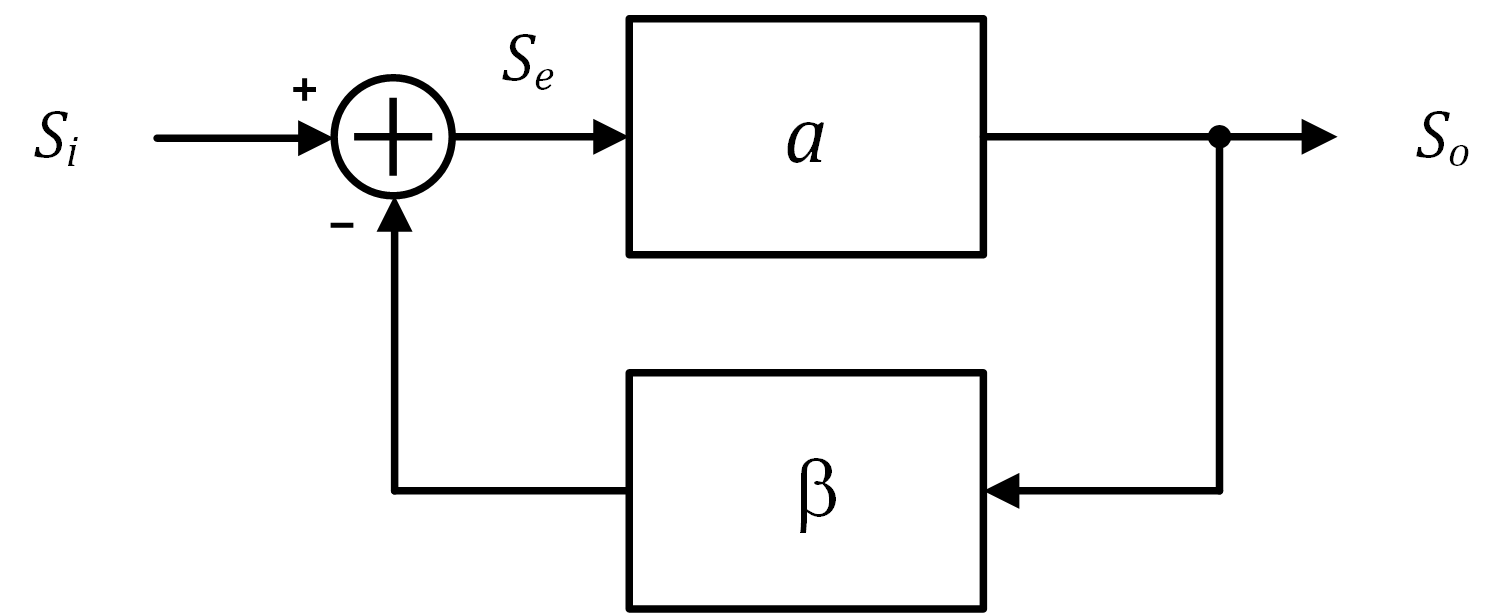

 - Negative feedback loop processes the error $S_i(s) -\beta \cdot S_o(s)$
 - If the magnitude of $a$ is large, the error is minimized, i.e. $S_i(s) - \beta \cdot S_o(s) \rightarrow 0$
 - In this sense, negative feedback “desensitizes” the transfer function to the open-loop gain $a$

## Non-inverting amplifier

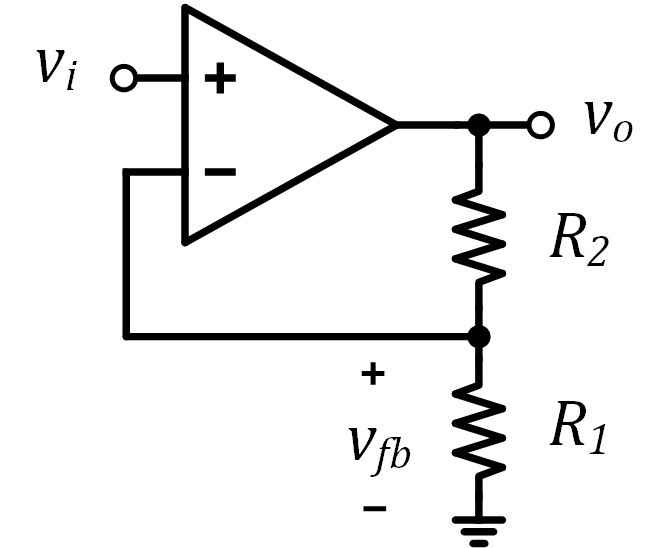

\begin{equation}
a = A_{0}
\end{equation}

\begin{equation}
\beta = \dfrac{R_1}{R_1 + R_2}
\end{equation}

\begin{equation}
\dfrac{v_o}{v_i} = \dfrac{A_{0}}{1+\beta A_{0}}
\end{equation}

 - A fraction of the output voltage (set by $\beta$) is fed back to the inverting input and the error voltage is processed by the amplifier
 - Open-loop gain specicification is determined by precision requirements (application-dependent)
 - Exact value of DC gain $A_0$ is unimportant as long as it’s “large enough”

## Gain-bandwidth product

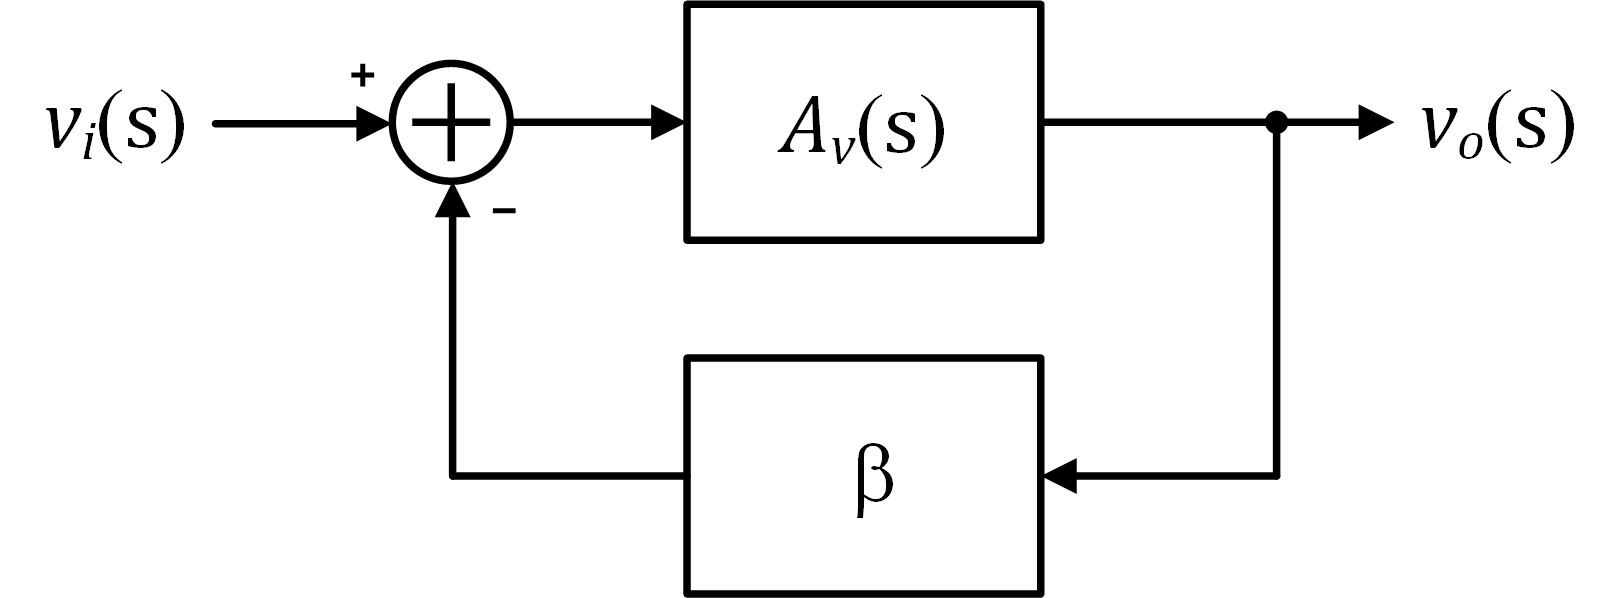

\begin{equation}
G(s) = \dfrac{v_o(s)}{v_i(s)} = \dfrac{A_{v}(s)}{1+\beta A_{v}(s)}
\end{equation}

\begin{equation}
A_v(s) = \dfrac{A_0}{1+s/\omega_0}
\end{equation}

\begin{equation}
GBW = A_0 \omega_0
\end{equation}

 - Assuming dominant-pole behavior, we can readily assess the effect of negative feedback on frequency response
 - $A_0$ is the $DC$ gain of the *open-loop* amplifier, and $\omega_0$ is the dominant pole frequency (i.e. $3dB$ bandwidth)

 - To determine the frequency response of the closed-loop system, we substitute the frequency-dependent expression for $A_v(s)$ into the closed-loop gain expression
 
\begin{equation}
G(s) = \dfrac{A_{v}(s)}{1+\beta A_{v}(s)} = \dfrac{A_0}{1+s/\omega_0 + \beta A_0} = \dfrac{\frac{A_0}{1+\beta A_0}}{1+\frac{s}{\omega_0 (1+\beta A_0)}}
\end{equation}

 - Solving for the closed-loop pole frequency gives
 
\begin{equation}
\omega_0^{'} = \omega_0\cdot(1+\beta A_0)
\end{equation}

In [8]:
def plot_CL_freq(A_dB, f_t, betas, w):
    A_0 = 10**(A_dB/20)
    f_3dB = f_t/A_0
    w_0 = f_3dB*2*np.pi
    A_s = np.array([])

    fig, axs = plt.subplots(2, figsize=(10.0, 8.0))
    for b in betas:
        Av_cl = signal.TransferFunction([A_0], [1/w_0, 1 + b*A_0])
        w, mag, phase = Av_cl.bode(w=w)       # rad/s, dB, degrees 
        f = w/2/np.pi   

        # Plot the frequency response for multiple values of beta
        fig.suptitle('Opamp Closed-Loop Frequency Response')
        axs[0].semilogx(f, mag)
        axs[0].grid()
        axs[0].set_ylabel('Magnitude [dB]')
        axs[1].semilogx(f,phase)
        axs[1].grid()
        axs[1].set_ylabel('Phase [deg]')
        axs[1].set_xlabel('Frequency [Hz]')
        fig.align_ylabels(axs[:])
        
def plot_CL_step(A_dB, f_t, betas, w):
    A_0 = 10**(A_dB/20)
    f_3dB = f_t/A_0
    w_0 = f_3dB*2*np.pi
    A_s = np.array([])
    
    fig, axs = plt.subplots(2, figsize=(10.0, 8.0))
    for b in betas:
        Av_cl = signal.TransferFunction([A_0], [1/w_0, 1 + b*A_0])
        tin = np.linspace(0,20e-6,100)
        u_step = np.concatenate( (0, np.ones(99)), axis=None)
        tout,vout = signal.step(Av_cl, X0=None, T=tin)

        # Plot the step response for multiple values of beta
        fig.suptitle('Opamp Closed-Loop Step Response')
        axs[0].plot(1e6*tout, b*vout)
        axs[0].grid()
        axs[0].set_ylabel(r'$\beta V_o$ [V]')
        axs[1].plot(1e6*tin,u_step)
        axs[1].grid()
        axs[1].set_ylabel('Input Voltage [V]')
        axs[1].set_xlabel('Time [$\mu $s]')
        fig.align_ylabels(axs[:])


## Gain-bandwidth (Bode)

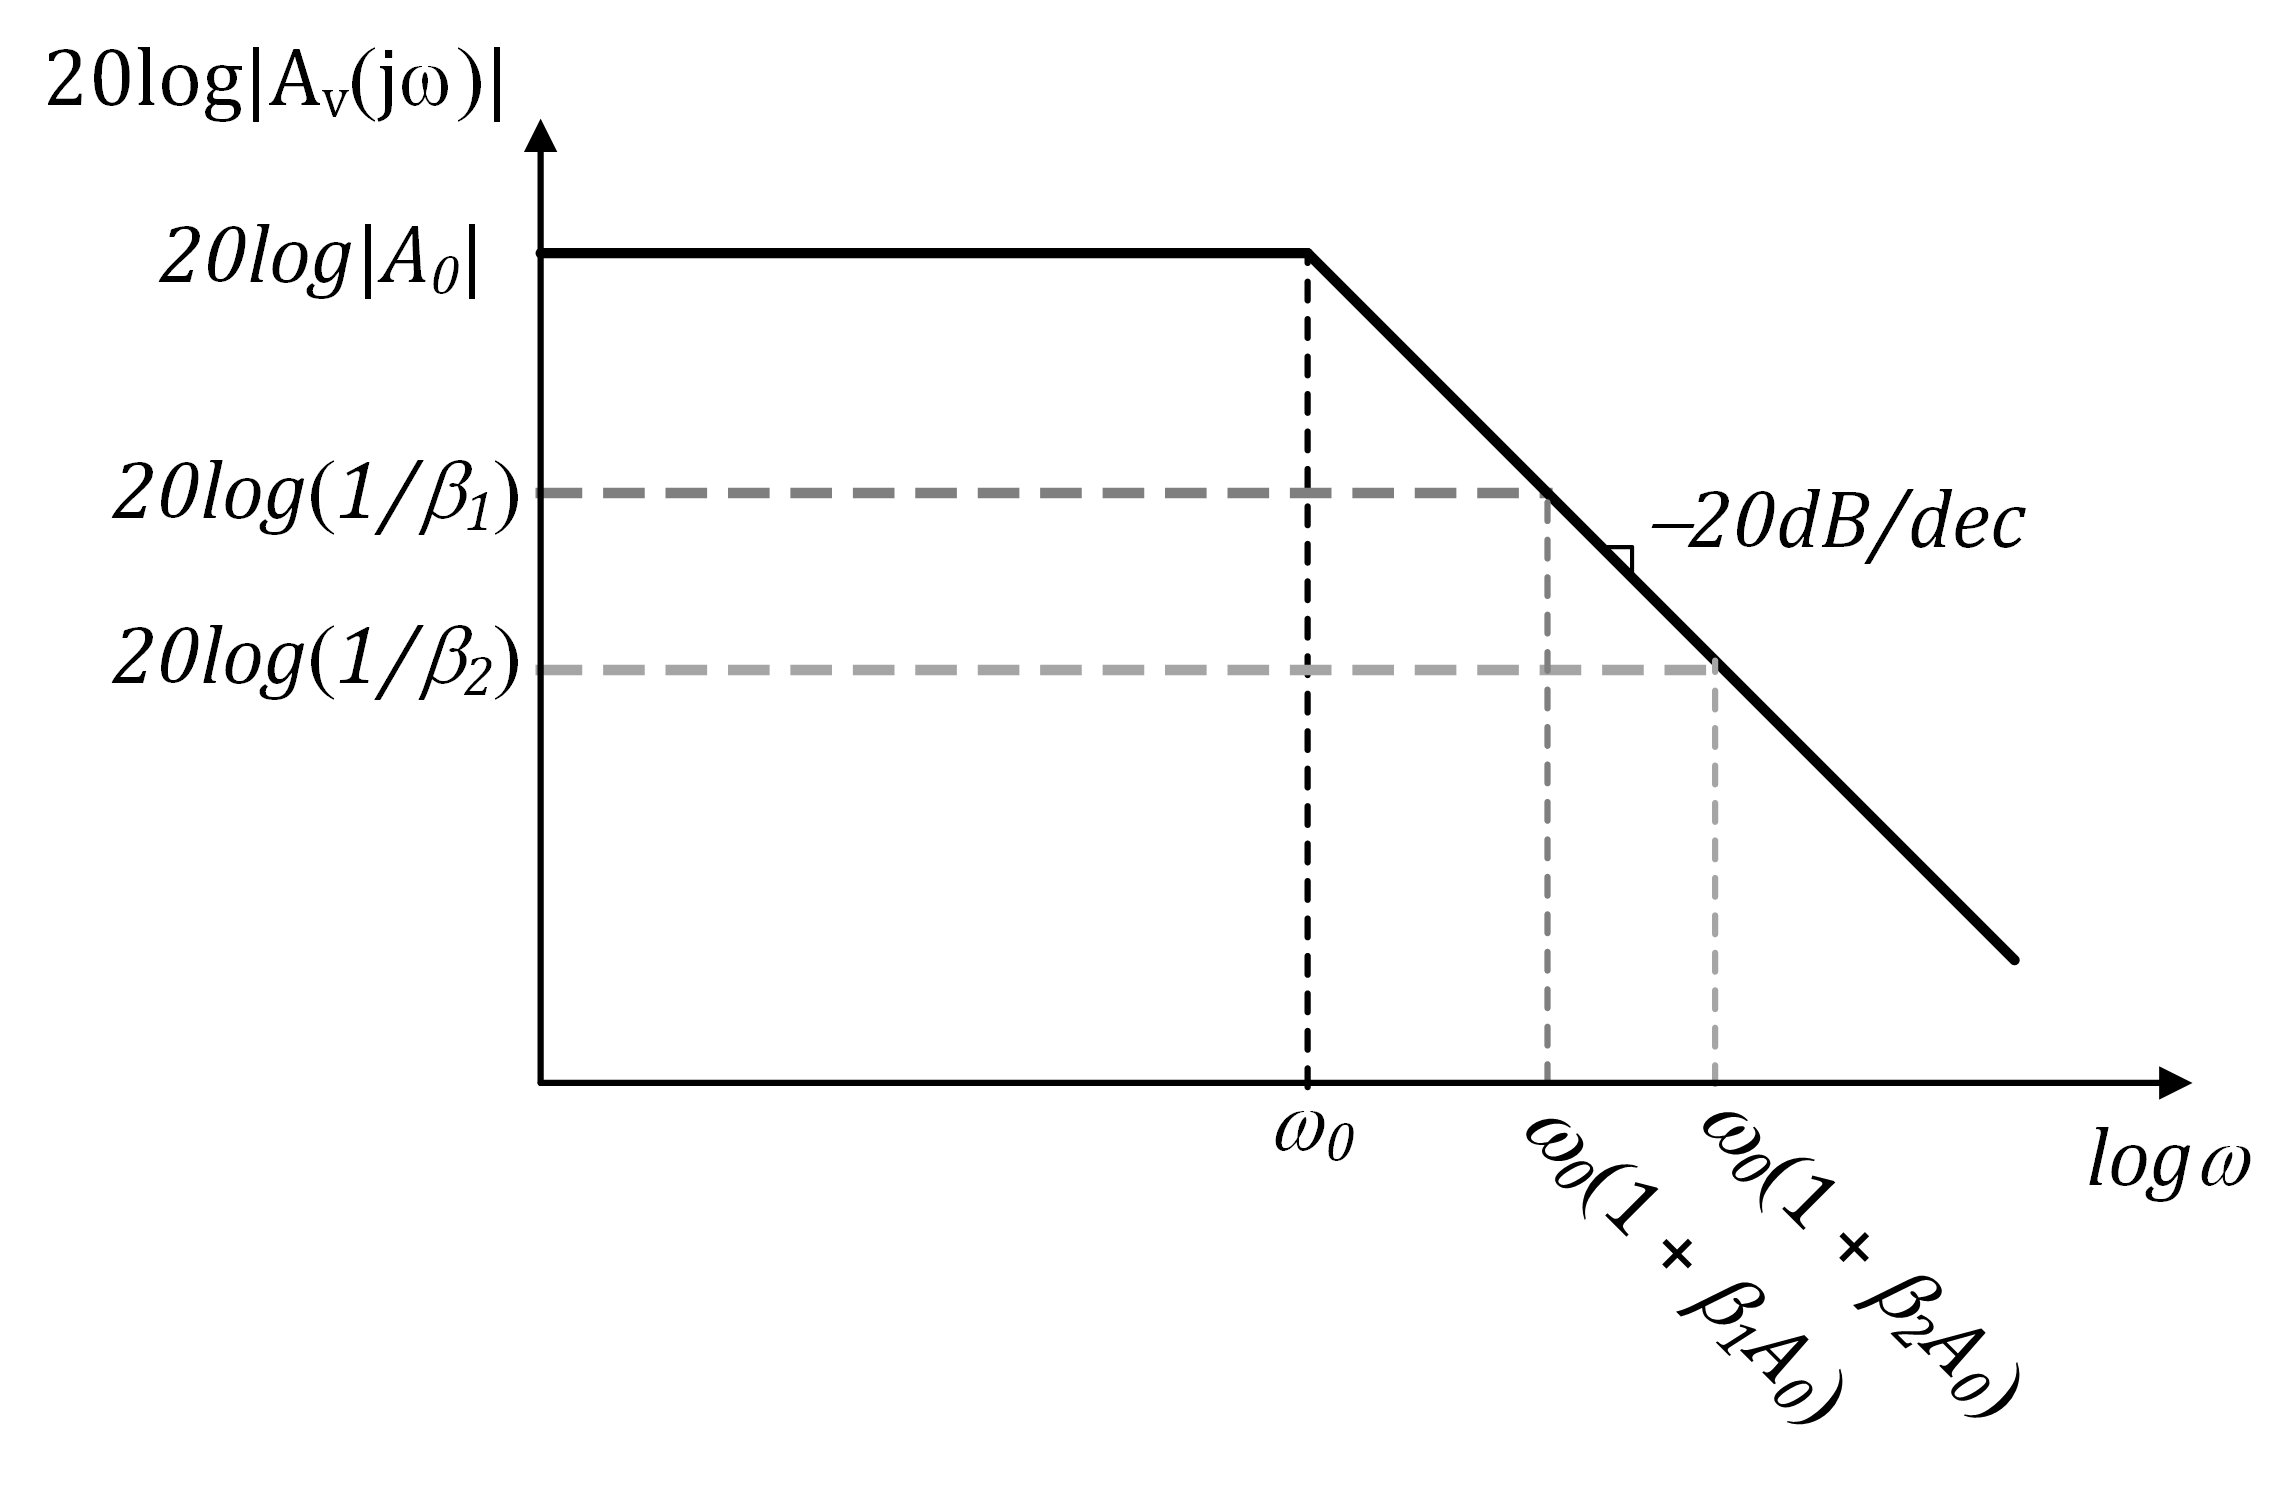


\begin{equation}
A_v(s) = \dfrac{A_0}{1+s/\omega_0}
\end{equation}

\begin{equation}
G(s) = \dfrac{\frac{A_0}{1+\beta A_0}}{1+\frac{s}{\omega_0 (1+\beta A_0)}}
\end{equation}

\begin{equation}
\omega_0^{'} = \omega_0\cdot(1+\beta A_0)
\end{equation}

 - For every $20dB$ reduction in closed-loop gain, the $3dB$ frequency increases by 1 decade
 - This results from a constant gain-bandwidth product, which is an intrinsic property of the open-loop amplifier
 - Note that this assumes that the impedances in the feedback network are purely real (i.e. resistors only) 

 - Let's take a look at the closed-loop frequency response as a function of the feedback factor $\beta$

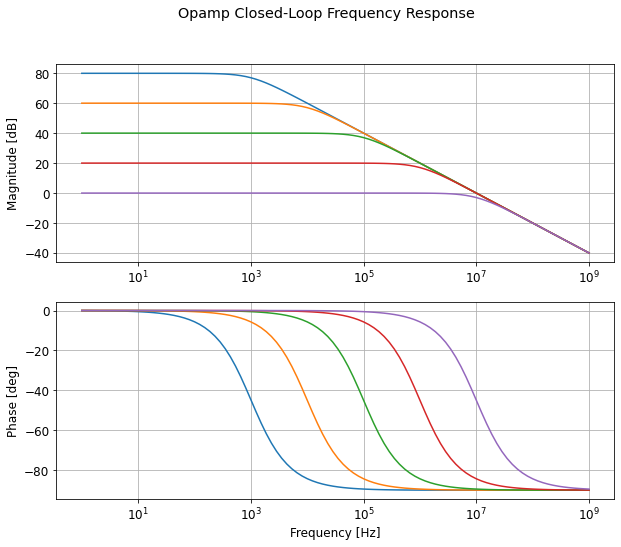

In [9]:
betas = np.logspace(-4, 0, num=5)
w = 2*np.pi*np.logspace(0,9,num=100)
plot_CL_freq(120, 10e6, betas, w)

## Stability: Barkhausen criteria

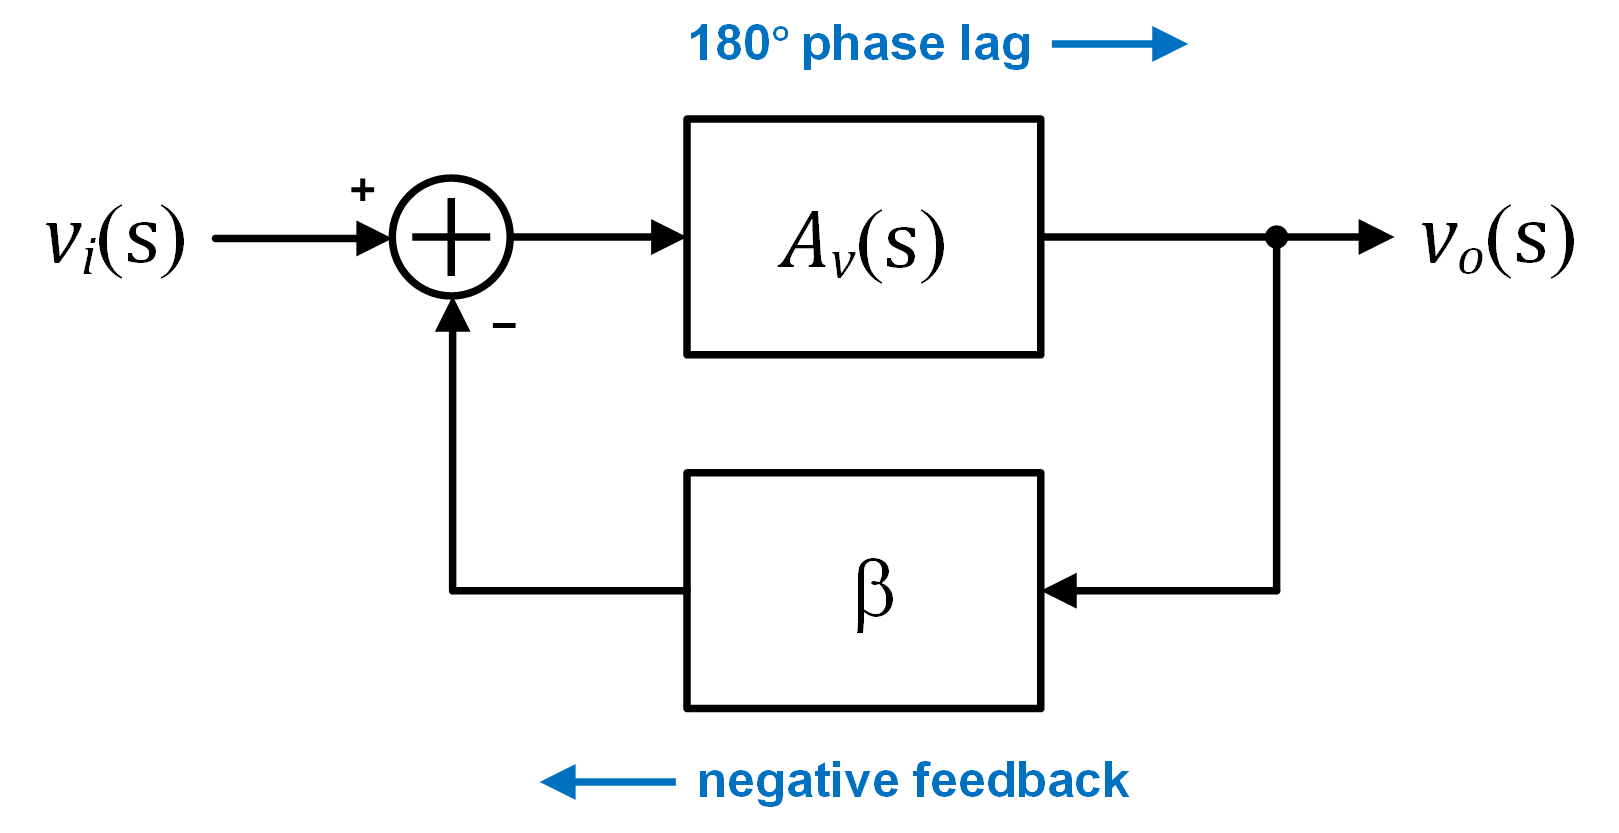

 - In a negative feedback loop, if the loop gain at a given frequency $\omega_1$ is $-1$, the circuit may oscillate
 - This corresponds to a loop gain magnitude $|\beta A_v(j\omega_1)| = 1$ and phase $\angle A_v(j\omega_1) = -180^{\circ}$

## Stability: Root locus

 - Open-loop transfer function

\begin{equation}
A_v(s) = \dfrac{A_0}{1+\dfrac{s}{\omega_0}}
\end{equation}

 - Closed-loop transfer function
 
\begin{equation}
G(s) = \dfrac{A_0}{1+s/\omega_0 + \beta A_0}
\end{equation}

 - Open-loop pole

\begin{equation}
s_0 = -\omega_0
\end{equation}

 - Closed-loop pole
 
\begin{equation}
s_0^{'} = -\omega_0(1+\beta A_0)
\end{equation}

 - Root locus plots involve plotting the closed-loop poles in the complex plane to evaluate stability
 
 - If a given pole $s = j\omega + \sigma$ falls in the right half plane ($RHP$), the system is unstable (phase lag $> 180^{\circ}$)
 
 - Here, for a single pole system, we have a single, real, $LHP$ pole, so the system is unconditionally stable

## Bode plot vs root locus

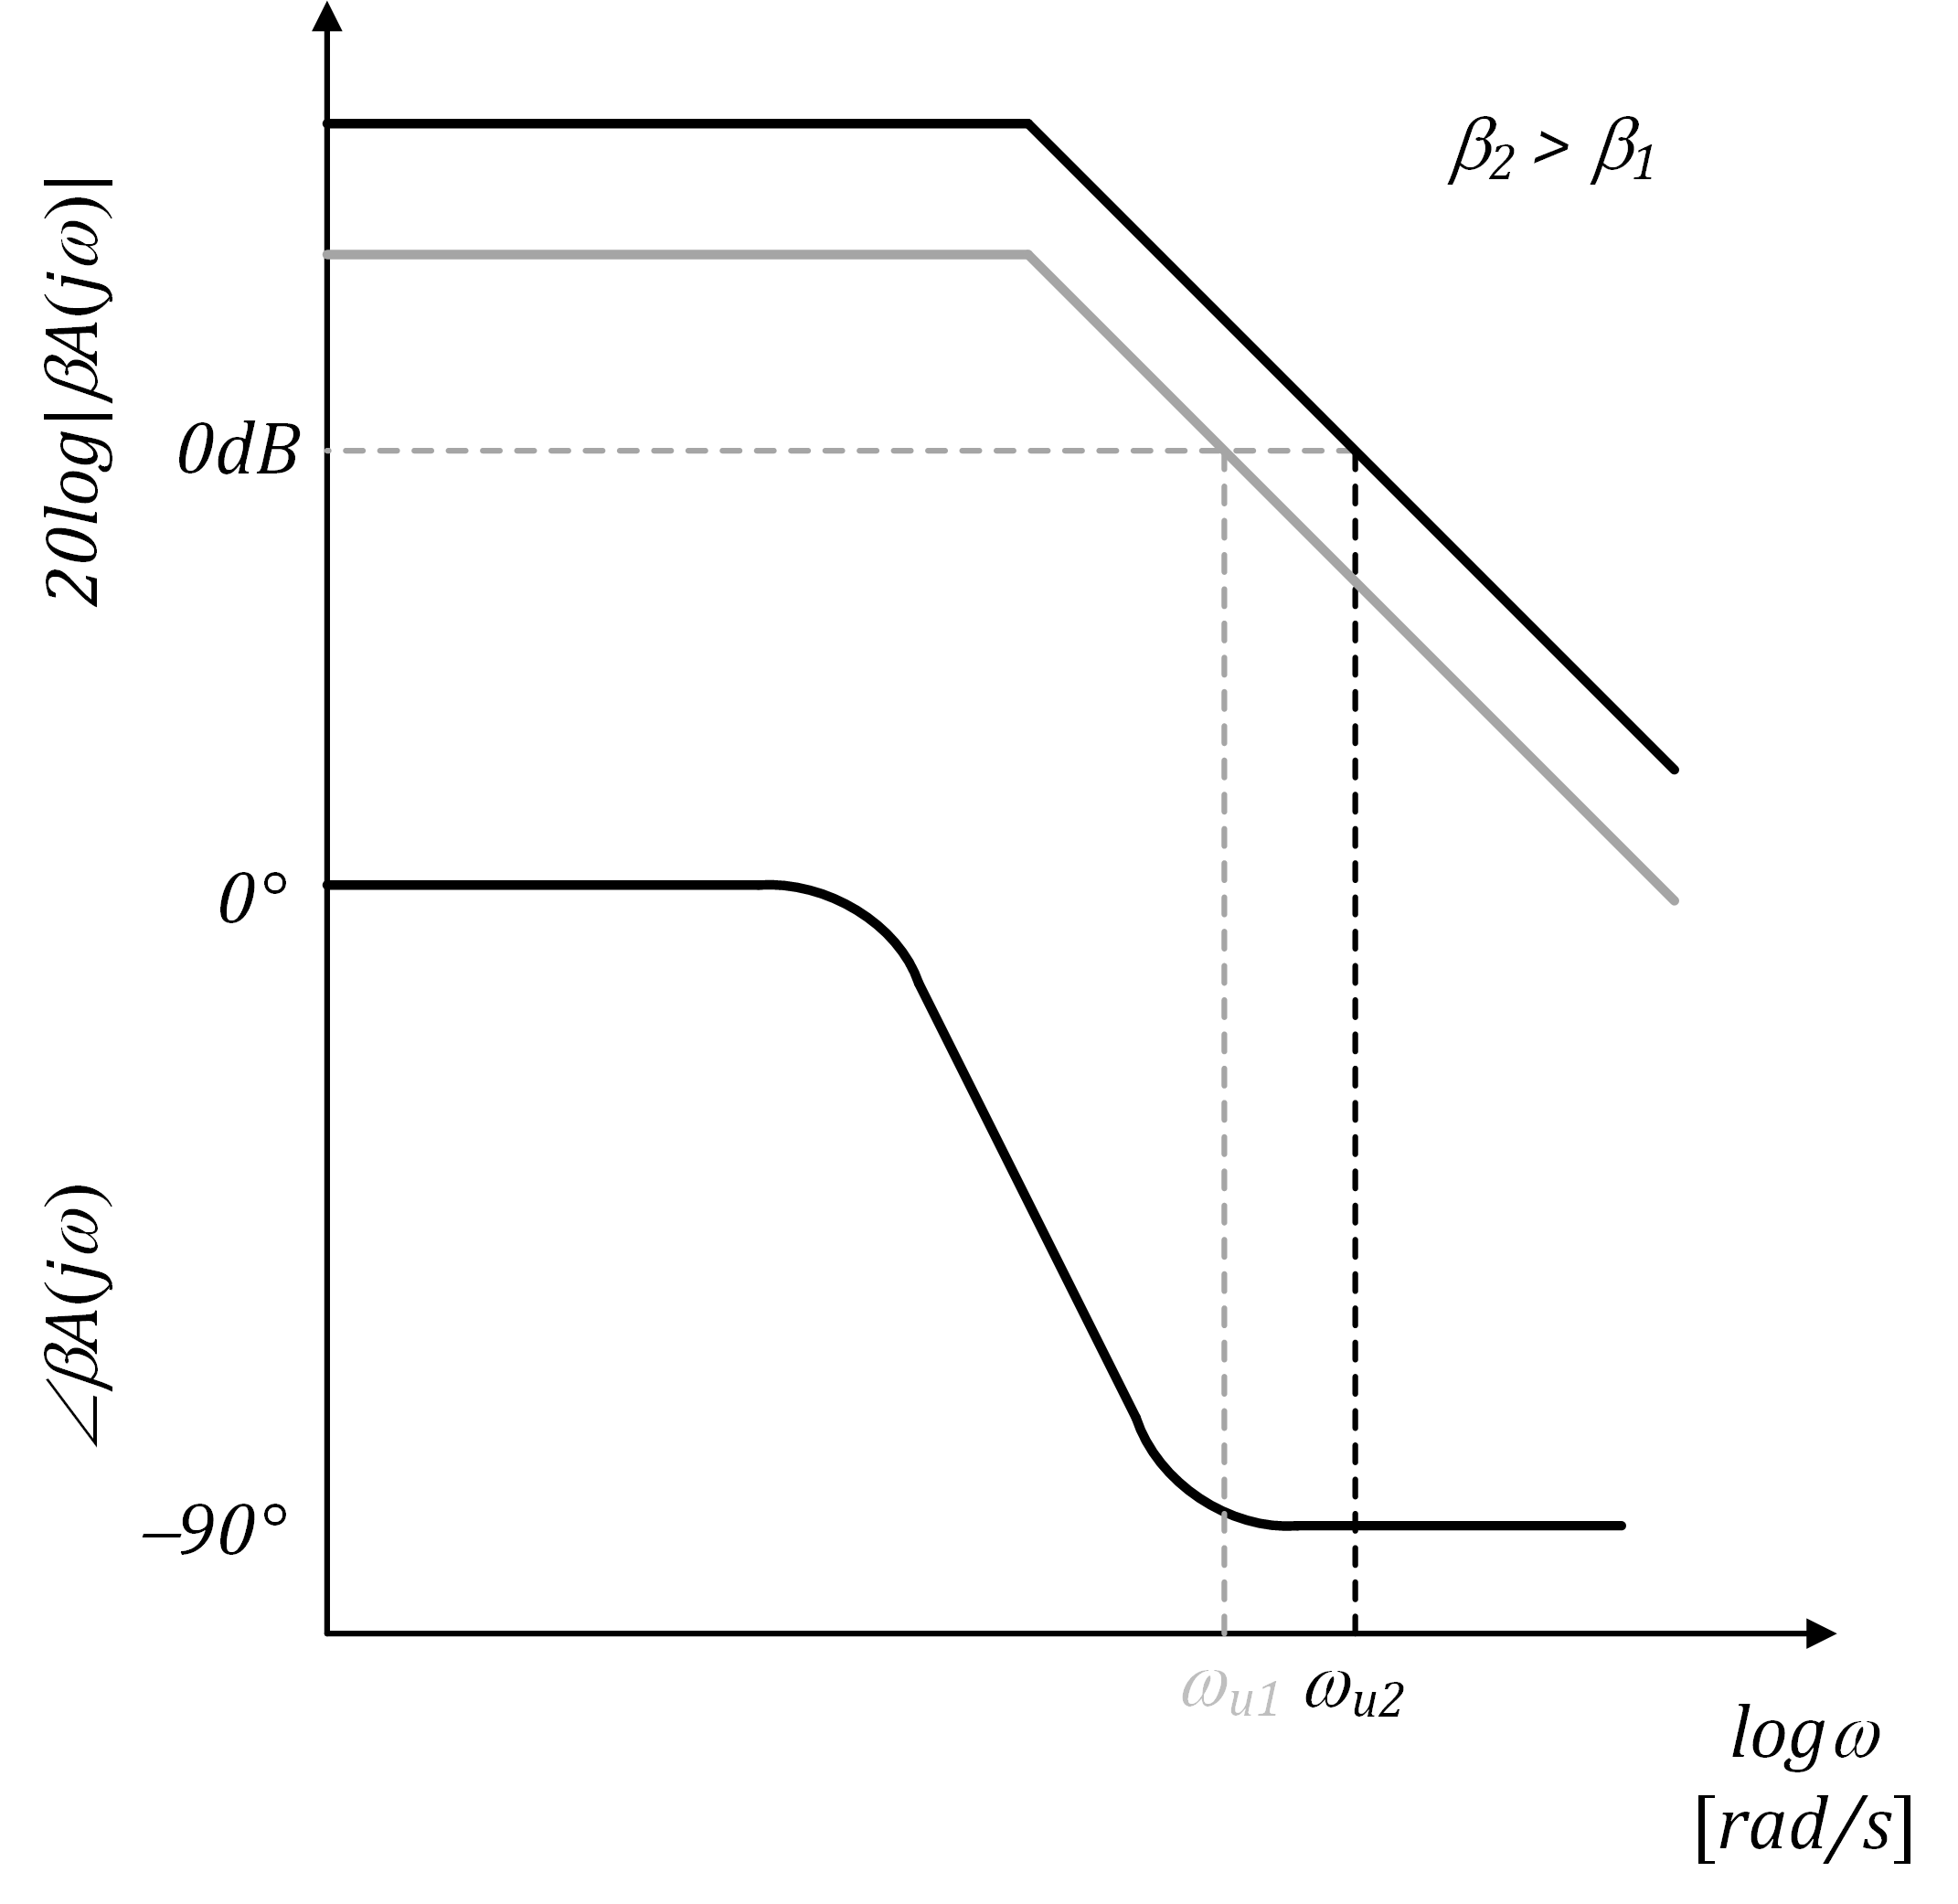

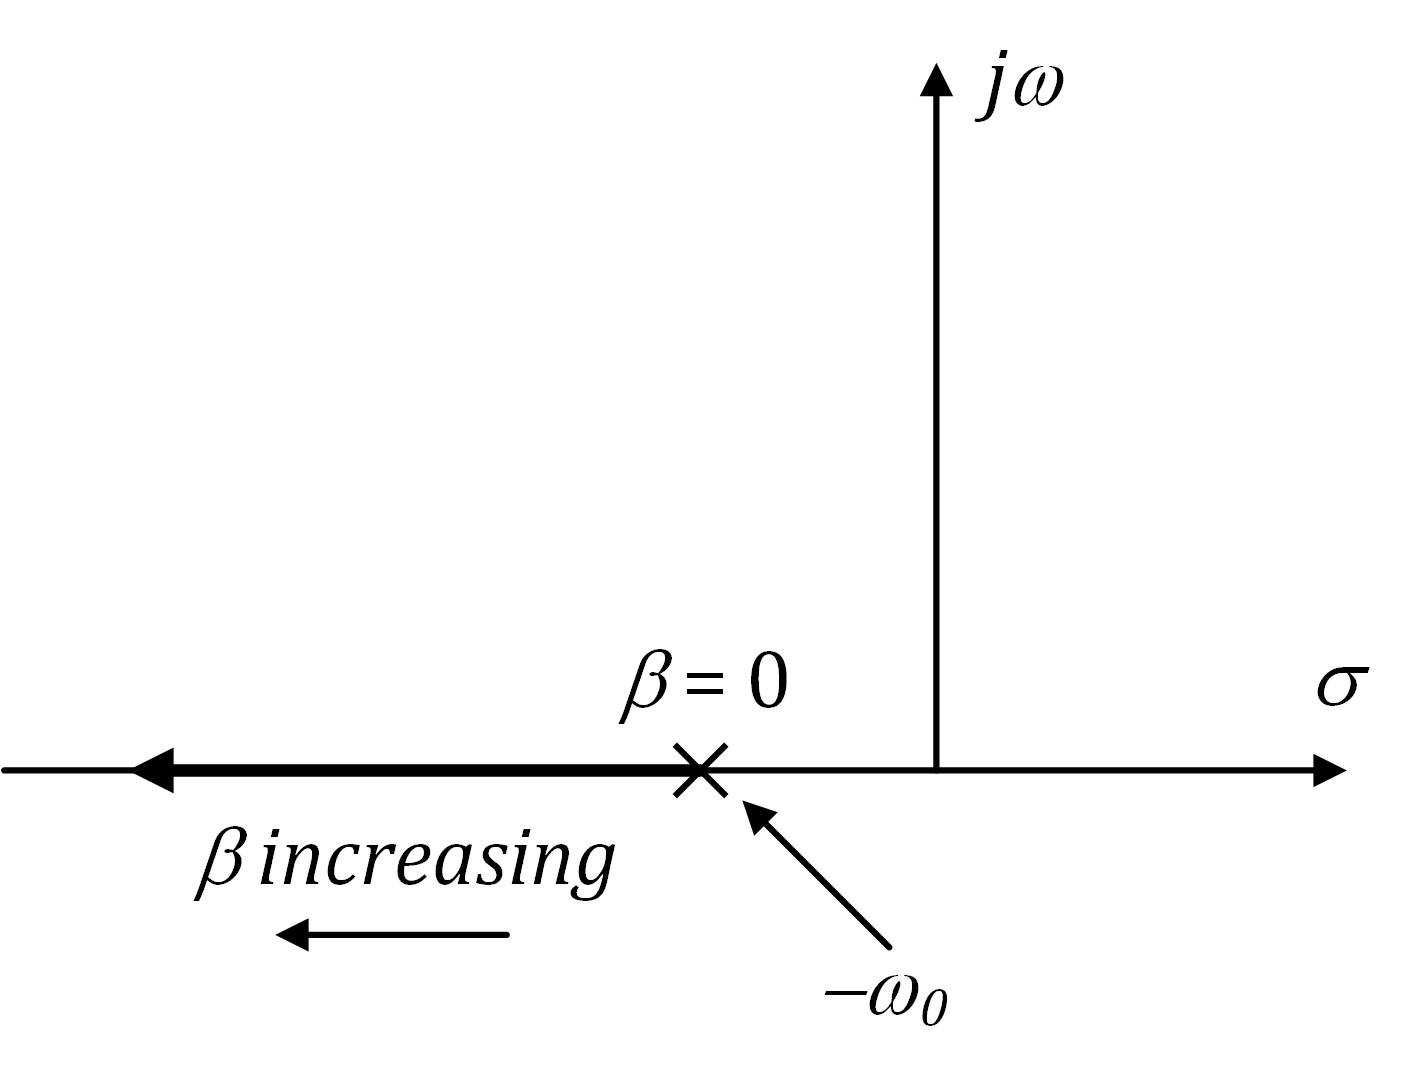

 - For a single-pole system both methods indicate unconditional stability:
    - Bode plot: Maximum phase lag of $90^{\circ}$
    - Root locus: Purely real, $LHP$ pole
 - For higher-order systems, the worst-case scenario arises when $\beta = 1$ (highest possible loop gain)

## Root locus of a second-order system

 - Open-loop transfer function
 
\begin{equation}
A_v(s) = \dfrac{A_0}{\left(1+\dfrac{s}{\omega_{p1}} \right) \left(1+\dfrac{s}{\omega_{p2}} \right)}
\end{equation}

 - Closed-loop transfer function
 
\begin{equation}
A_v(s) = \dfrac{A_0}{\left(1+\dfrac{s}{\omega_{p1}} \right) \left(1+\dfrac{s}{\omega_{p2}} \right) + \beta A_0}
\end{equation}

 - For a second-order system, the situation is more “complex”
 
 - We can solve for the closed-loop pole locations using the quadratic formula and plot them in the complex plane to evaluate stability

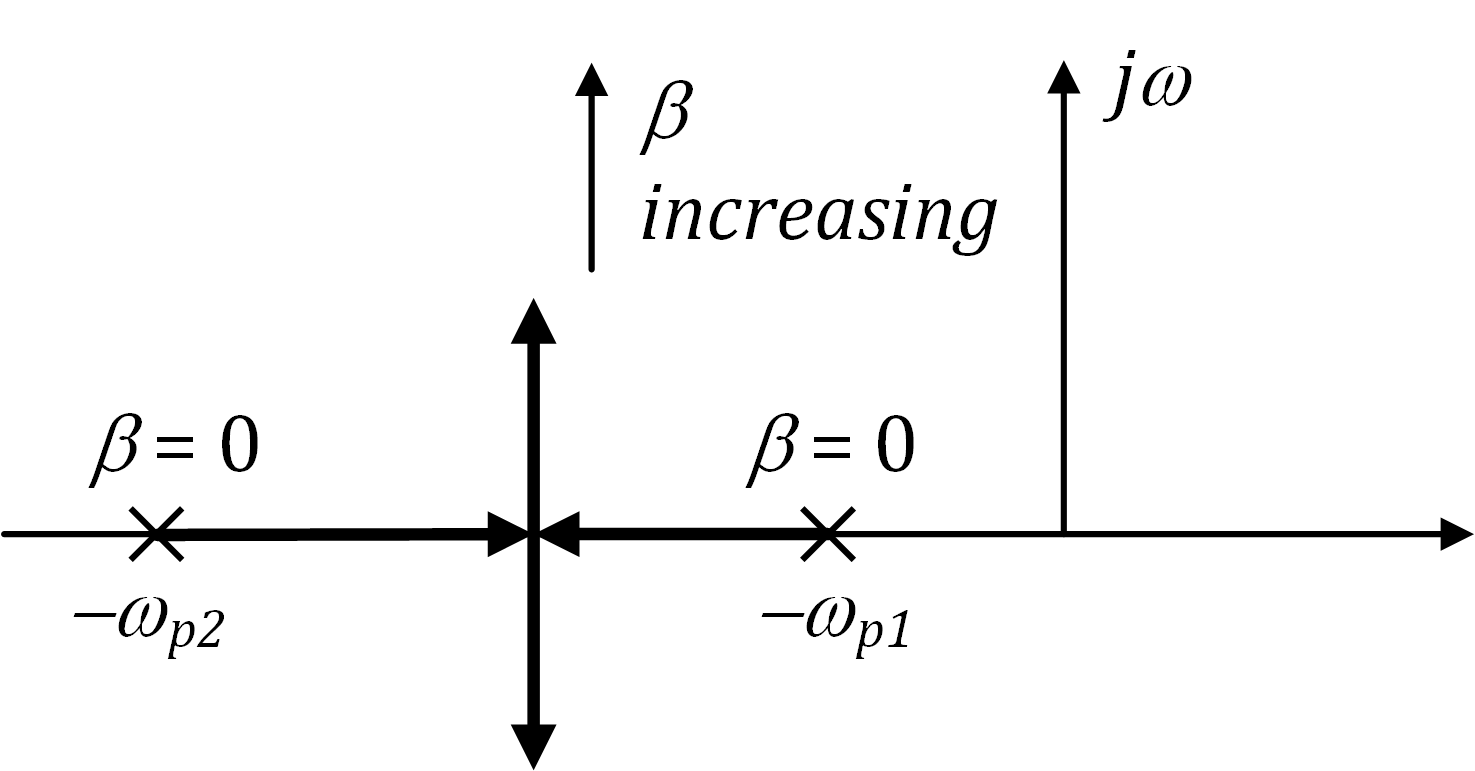

 - The closed-loop poles are given by

\begin{equation}
s_{p1,2} = \dfrac{-(\omega_{p1} + \omega_{p2})\pm \sqrt{(\omega_{p1}+\omega_{p2})^2 - 4(1+\beta A_0)\omega_{p1} \omega_{p2}}}{2}
\end{equation}

 - When $\beta = 0$ (no feedback), the closed-loop poles are equal to the open-loop poles
 - As $\beta$ increases, the imaginary components of $s_{p1}$ and $s_{p2}$ increase

## Damping ratio and phase margin

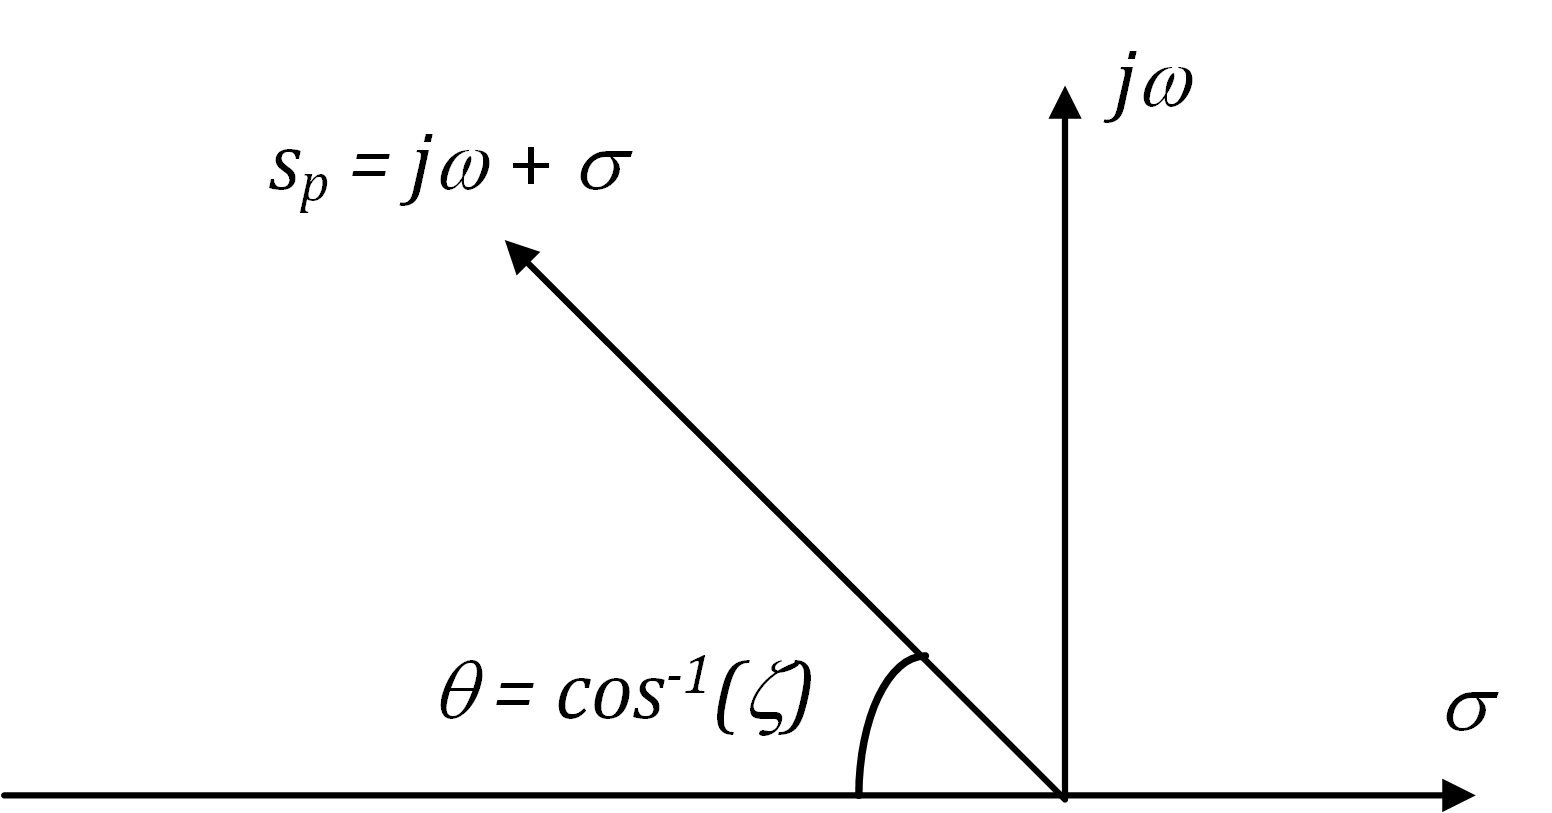

\begin{equation}
PM = \tan^{-1}\dfrac{2\zeta}{-2\zeta^2 + \sqrt{1+4\zeta^2}}
\end{equation}

 - As $\beta$ increases, the angle $\cos^{-1}(\zeta)$ increases, the magnitude of the imaginary component increases relative to that of the real component  
 
 - $\zeta$ is referred to as the “damping factor,” and can be used to evaluate the qualitative behavior of the impulse response
 
 - Another means of evaluating this behavior is by looking at the phase margin, which enables use of the Bode plot


## Phase margin of a single-pole system

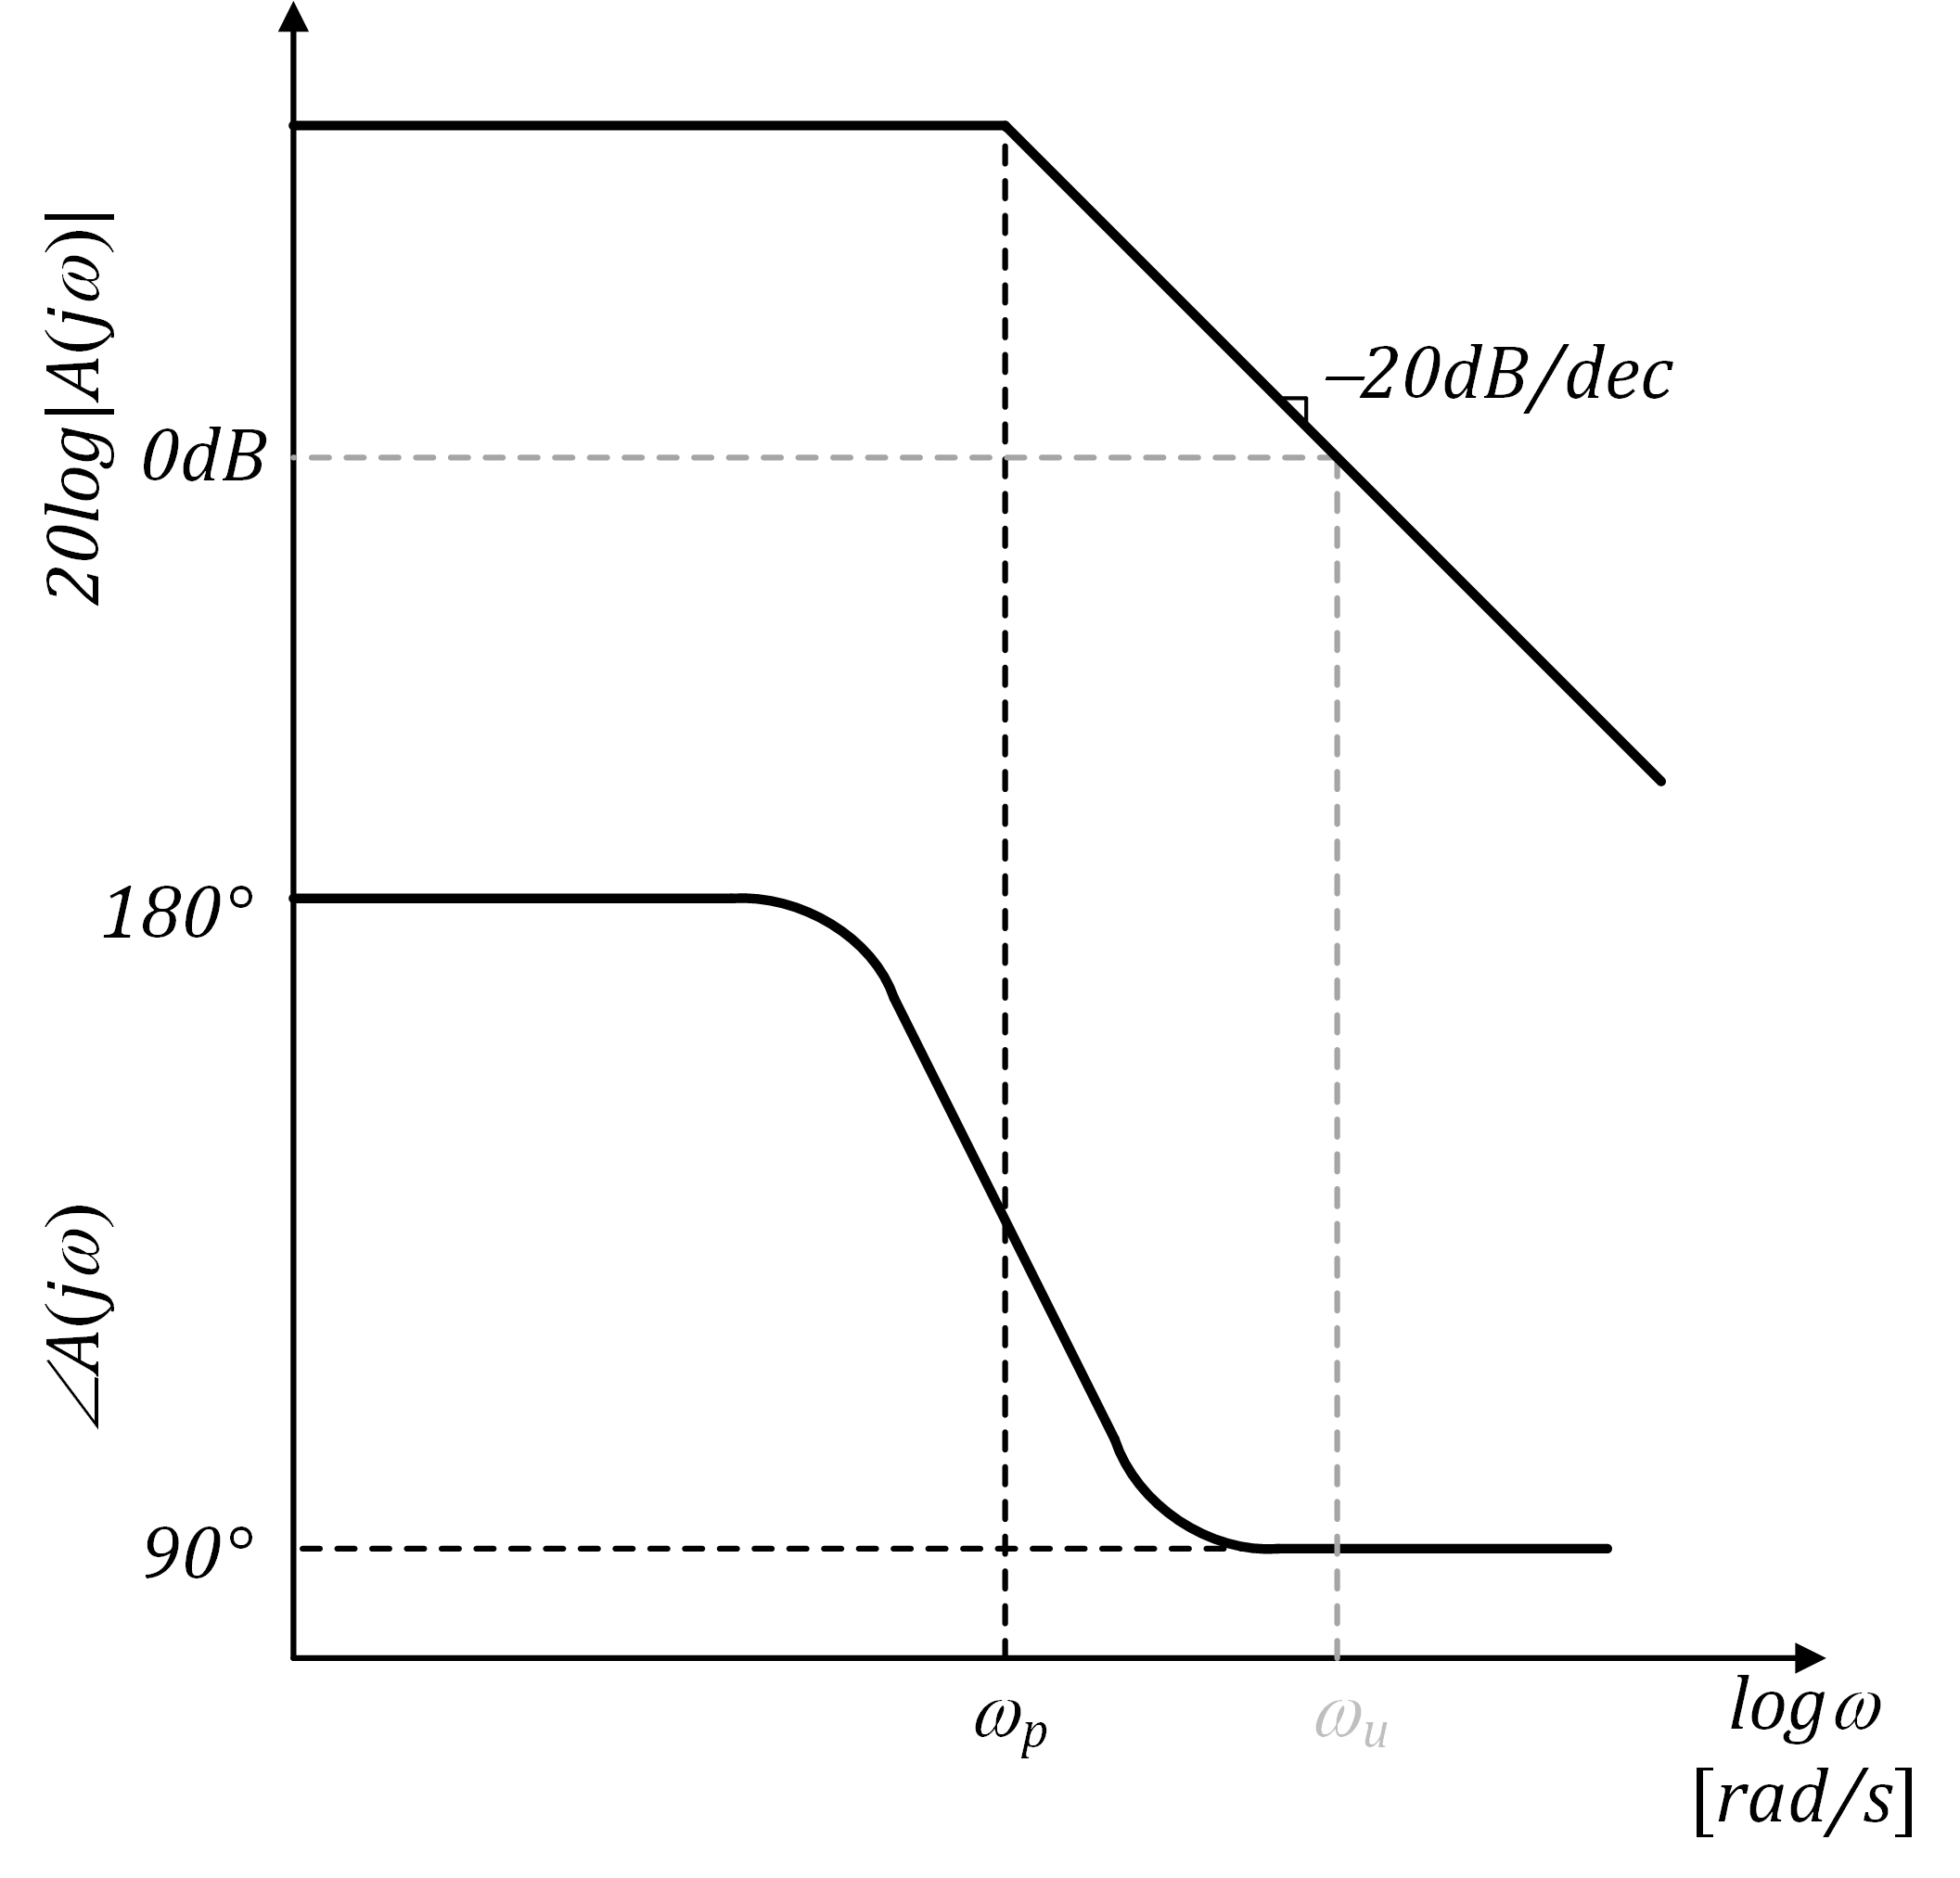

 - Here, phase margin is defined as
 
\begin{equation}
PM = \angle A(j\omega_u) - 0^{\circ}
\end{equation}

 - For a single-pole system, the phase margin is

\begin{equation}
PM = \angle A(j\omega_u) = 180^{\circ} - \tan^{-1}\dfrac{\omega_u}{\omega_{p1}}
\end{equation}

 - This has a minimum value of
 
\begin{equation}
PM \geq 180^{\circ} - 90^{\circ} = 90^{\circ}
\end{equation}

 - This guarantees stability and a "well behaved" step response

## Phase margin of a two-pole system

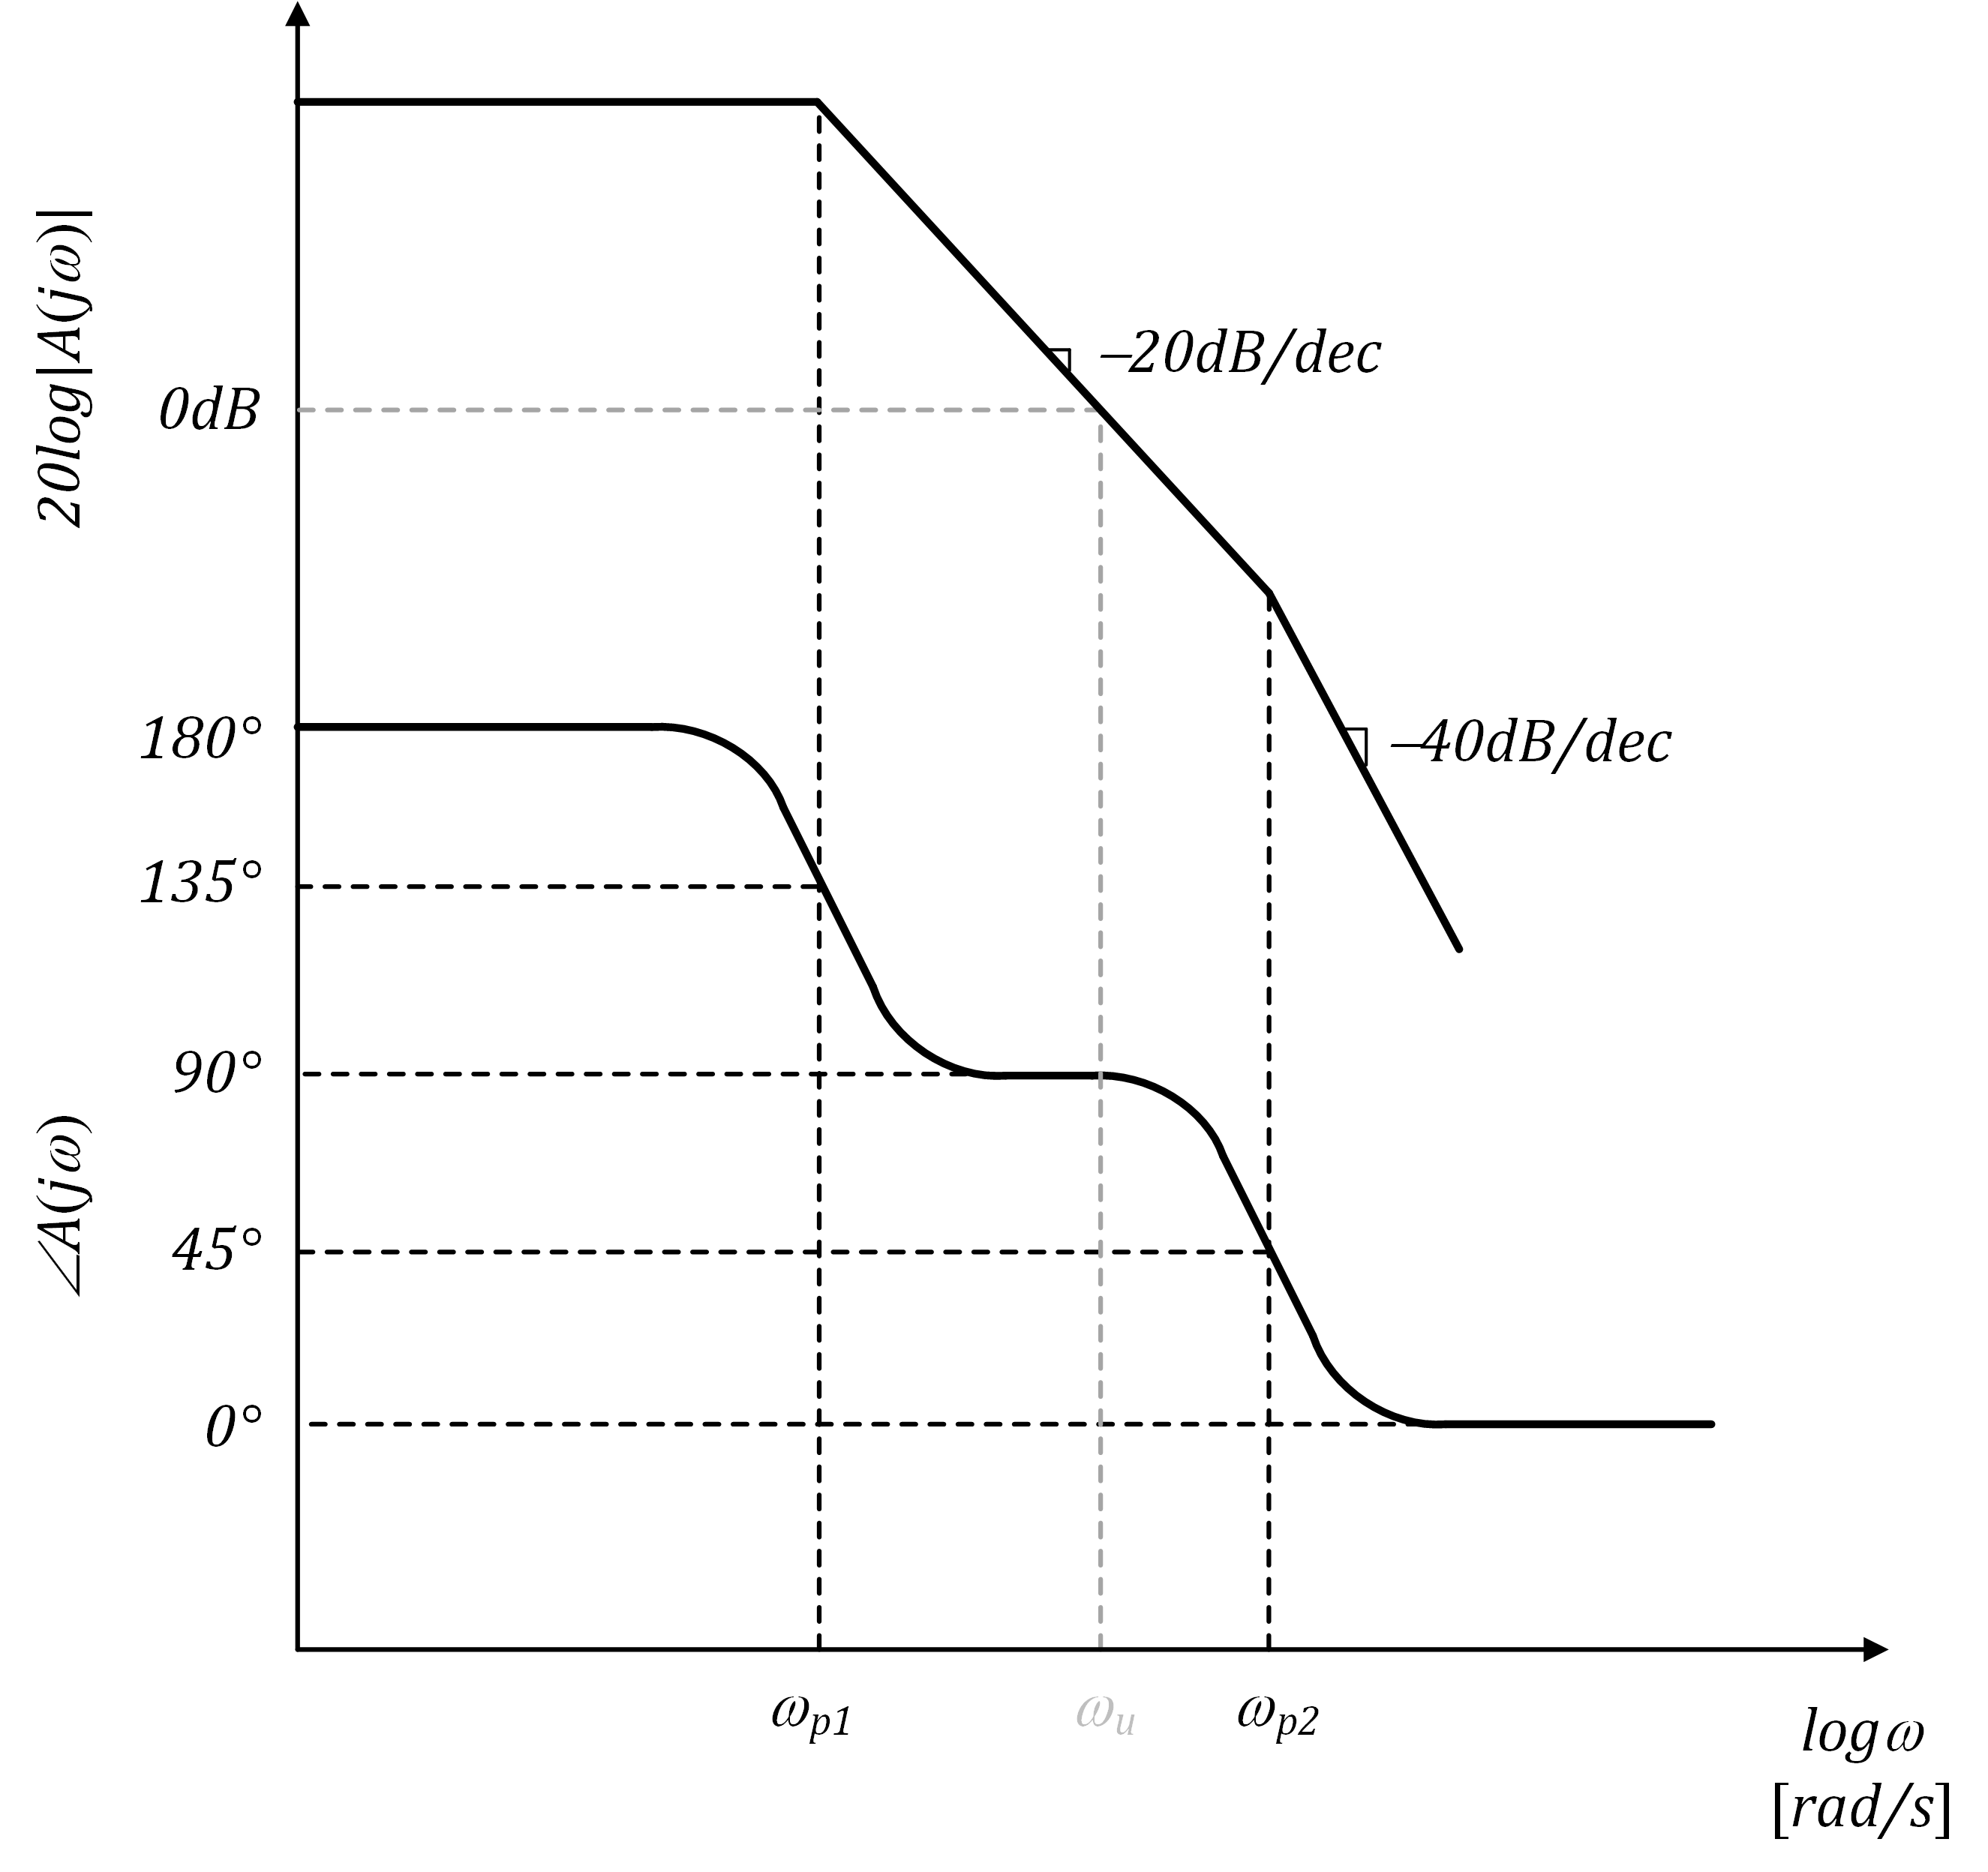

 - For stability (i.e. no oscillation), we need
 
\begin{equation}
A(j\omega_u) > 0^{\circ}
\end{equation}

 - For a well-behaved response, we prefer to have

\begin{equation}
A(j\omega_u) \geq 60^{\circ}
\end{equation}


 - This places a requirement on $\omega_{p2}$ of
 
\begin{equation}
\tan^{-1}\dfrac{\omega_u}{\omega_{p2}} \leq 30^{\circ}
\end{equation}

\begin{equation}
\boxed{\omega_{p2} \geq 1.73\omega_u}
\end{equation}


## Telescopic cascode amplifier

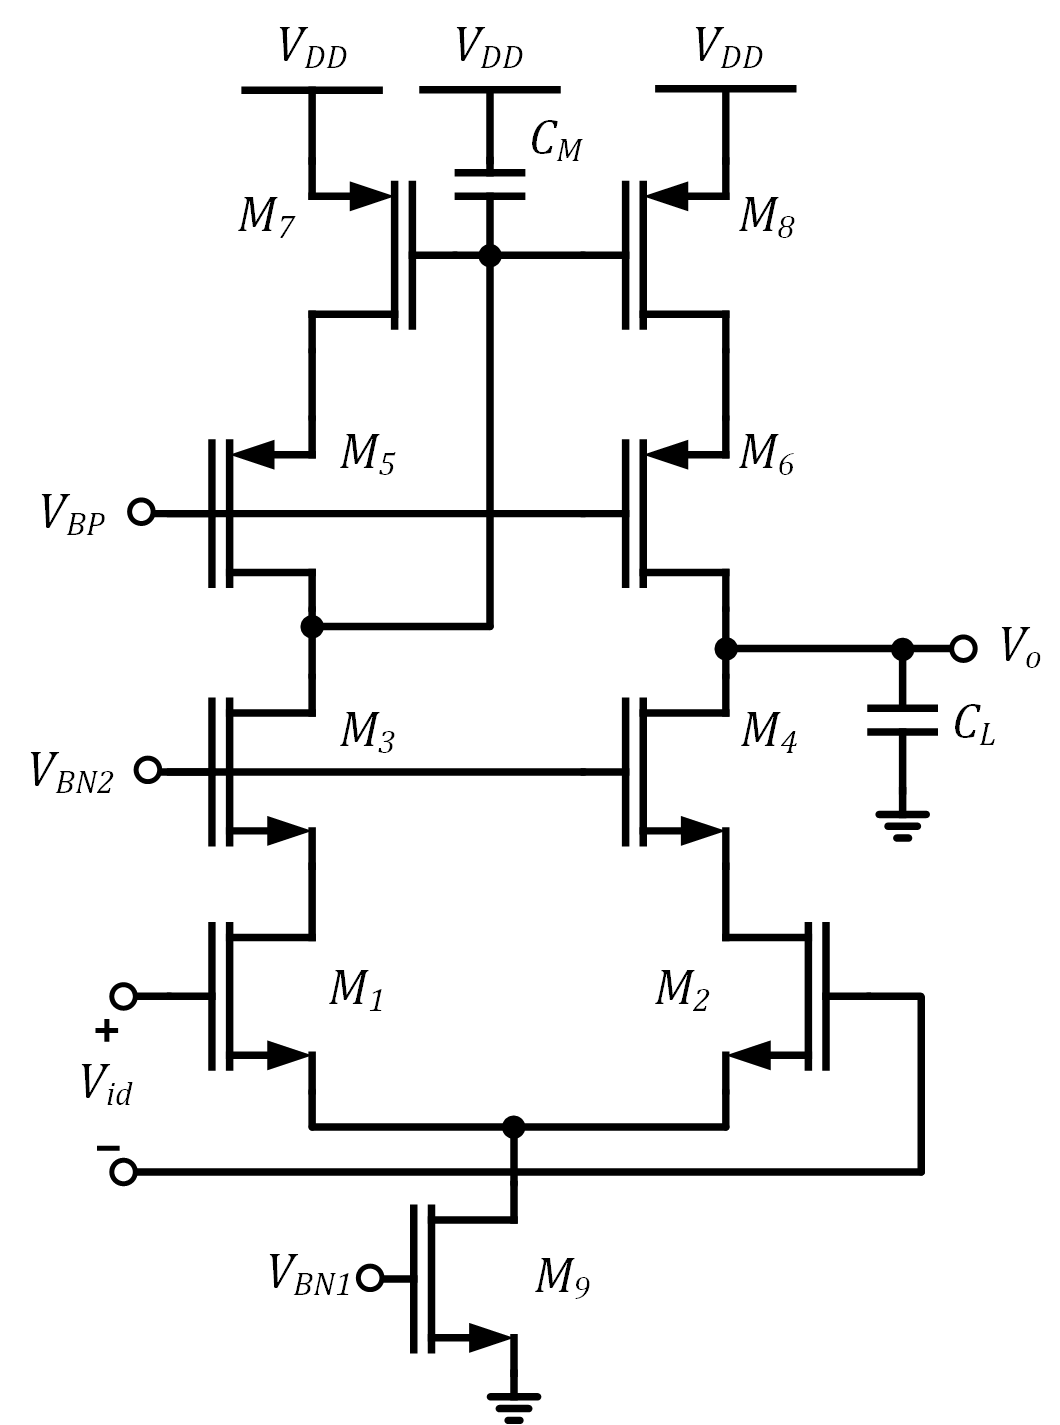

 - $C_M$ represents parasitic capacitance at the gate node of $M_7$, $M_8$
 
 - $C_M$ may be large if $V_{OV7,8}$ is small
 
 - $M_7$ gate connection functions as a diode-connected MOS in the small-signal model
 
 - The $3dB$ frequency can be found by ZVTC analysis, but assuming $C_L >> C_M$, it can be approximated as the product of $R_o$ and $C_L$

## M<sub>7</sub> diode connection (small signal analysis)

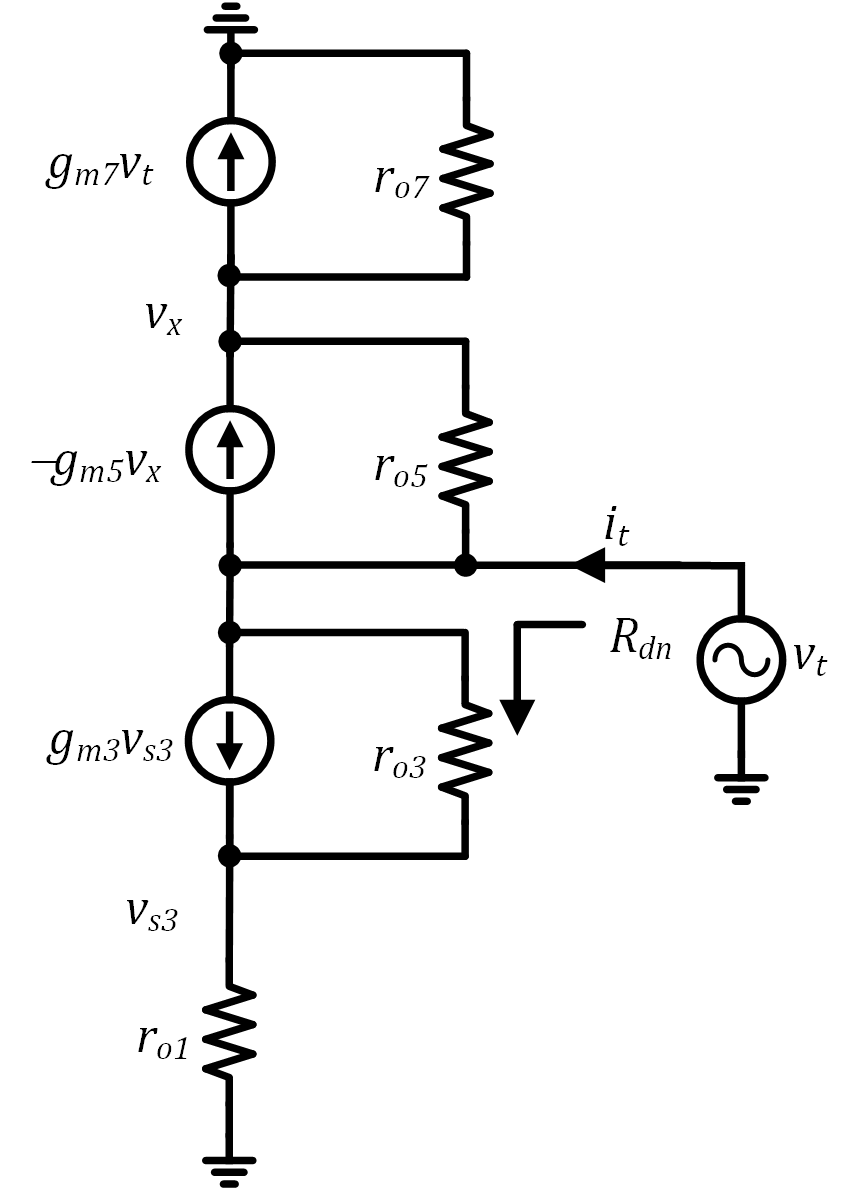

\begin{equation}
i_{up} = \dfrac{v_t - v_x}{r_{o5}} - g_{m5}v_x \:\:\:\:\:\:\: v_x = \dfrac{v_t - i_{up}r_{o5}}{g_{m5}r_{o5}+1}
\end{equation}

\begin{equation}
i_{up} = g_{m7}v_t+\dfrac{v_x}{r_{o7}} = g_{m7}v_t + \dfrac{v_t-i_{up}r_{o5}}{r_{o7}(g_{m5}r_{o5}+1)}
\end{equation}

\begin{equation}
i_{up}\left(1+\dfrac{r_{o5}}{r_{o7}(g_{m5}r_{o5}+1)}\right) = v_t\left(g_{m7}+\dfrac{1}{r_{o7}(g_{m5}r_{o5}+1)}\right)
\end{equation}

 - The output resistance is thus

\begin{equation}
\boxed{R_{up} = \dfrac{v_t}{i_{up}}\approx \dfrac{1}{g_{m7}}}
\end{equation}
 

## Telescopic amplifier frequency response

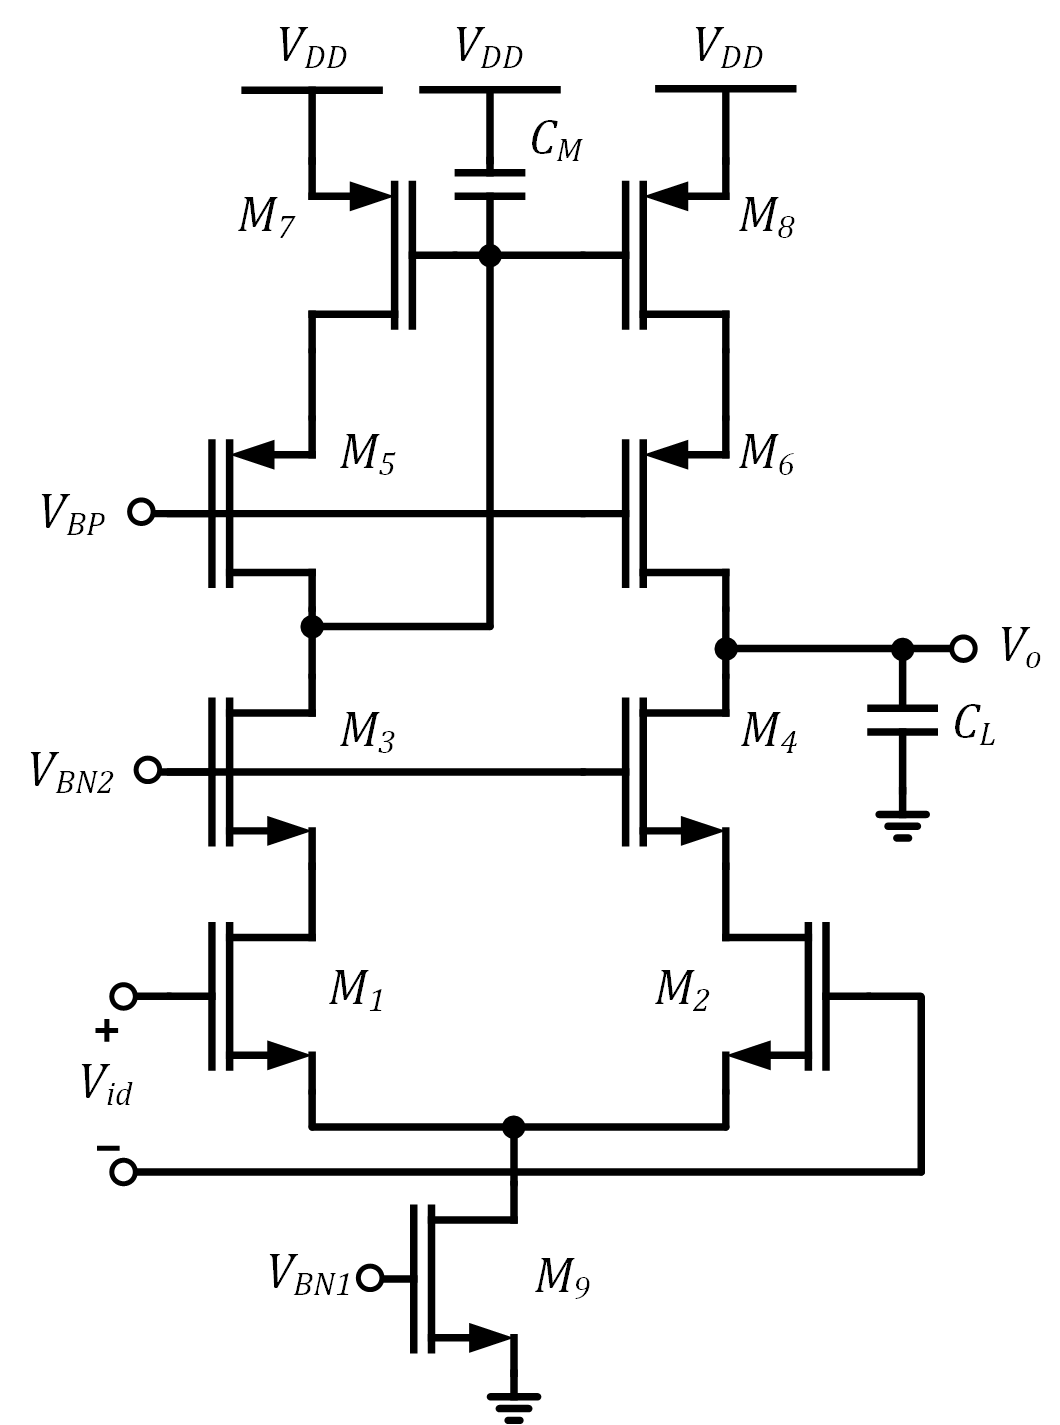

 - The dominant pole frequency is
 
\begin{equation}
\omega_{p1} \approx \dfrac{1}{g_{m6}r_{o6}r_{o8}||g_{m4}r_{o4}r_{o2}}
\end{equation}

 - The non-dominant pole is given by
 
\begin{equation}
\omega_{p2} \approx \dfrac{g_{m7}}{C_M}
\end{equation}

 - Assuming $\omega_{p2} >>  \omega{p1}$, the gain-bandwidth is
 
\begin{equation}
\omega_u \approx \dfrac{g_{m1,2}}{C_L}
\end{equation}

- The phase is

\begin{equation}
\angle A(j\omega) = 180^{\circ} - \tan^{-1}\dfrac{\omega}{\omega_{p1}} - \tan^{-1}\dfrac{\omega}{\omega_{p2}}
\end{equation}


## Telescopic amplifier phase margin

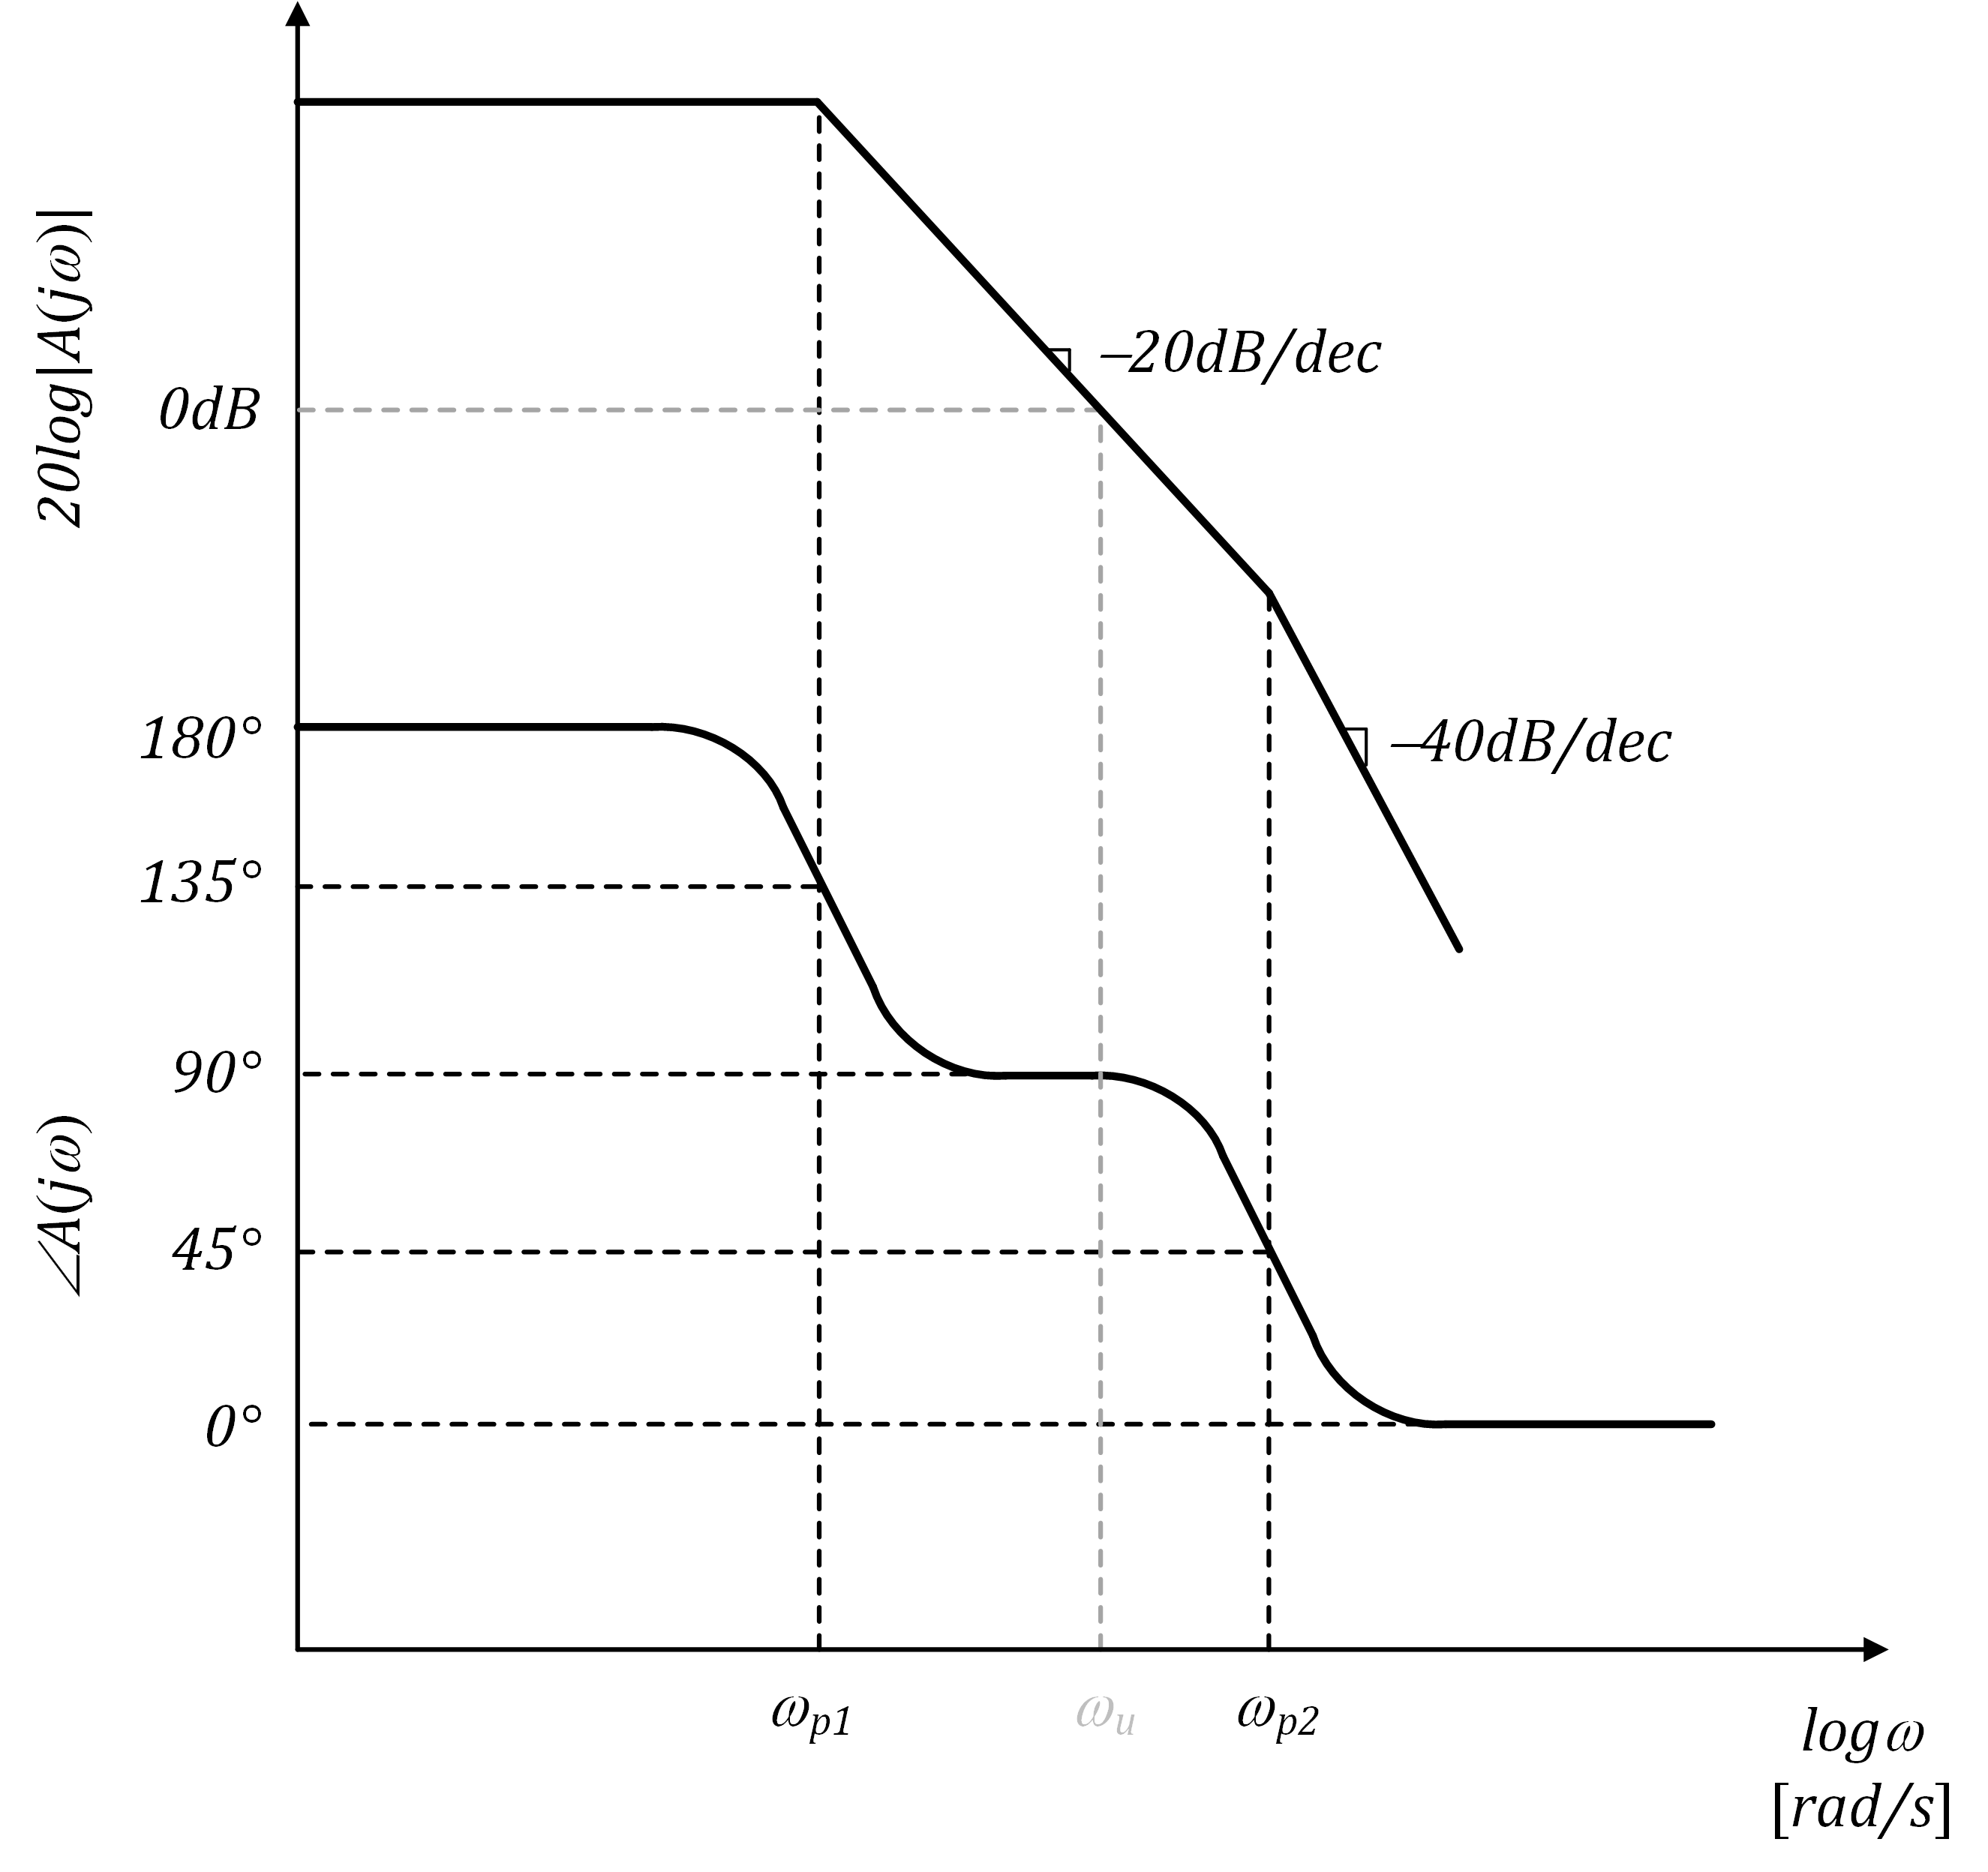

 - For a well-behaved response we need

\begin{equation}
A(j\omega_u) \geq 60^{\circ}
\end{equation}


 - Assuming a two-pole amplifier, this requires
 
\begin{equation}
\dfrac{g_{m7}}{C_M} \geq 1.73 \dfrac{g_{m1,2}}{C_L}
\end{equation}

 - If constant bandwidth ($g_{m1,2}/C_L$) is assumed, either $g_{m7}$ or $C_M$ needs to be minimized to meet this requirement
 
 - Both terms can be reduced by reducing $W_{7,8}$ while keeping $L$ constant (this will increase $V_{OV7,8}$)

## Frequency response of a 2-stage amplifier

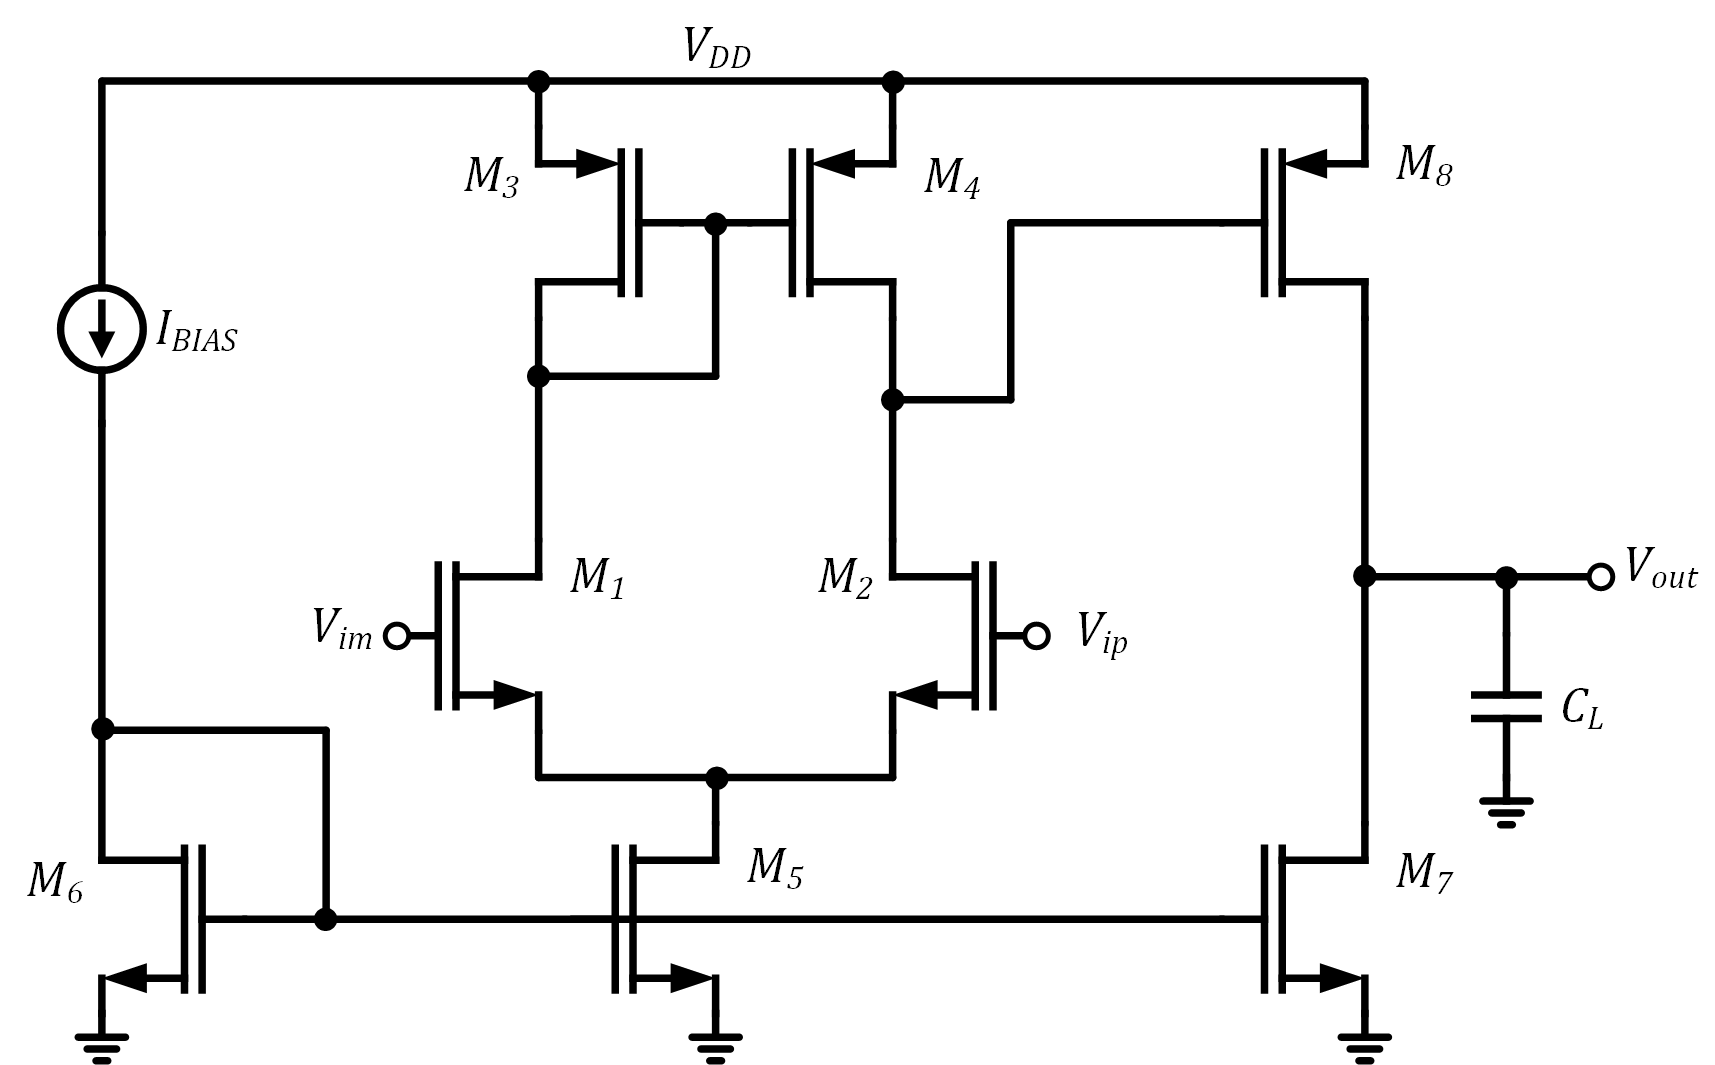

 - A 2-stage amplifier can be analyzed in the same manner as a common-source amplifier
 
 - Here we primarily focus on the second stage, due to the high output impedance of the first stage ($R_{o1} = r_{o2}||r_{o4}$) and the Miller effect of $M8$
 
 - The DC gain of the amplifier is given by the product of the gains of the individual stages:
 
\begin{align}
A_0 &= G_{m1}R_{o1}G_{m2}R_{o2}\\
&= g_{m1}r_{o2}||r_{o4}\cdot g_{m8}r_{o8}||r_{o7}
\end{align}

 - Let's take a look at the frequency response...

 - Assuming the mirror pole is well above the unity-gain bandwidth of the amplifier, the 2-stage CMOS OTA can be analyzed as a common-source amplifier with $R_{o1} = r_{o2}||r_{o4}$ as the output impedance of the driving stage
 - In this case, the transfer function is given as
 
\begin{align}
A_v(s) &= g_{m1}R_{o1}\dfrac{(sC_{GD} - g_{m8})R_{o2}}{R_{o1} R_{o2}\xi s^2 + [R_{o1}(1+g_{m8}R_{o2})C_{GD} + R_{o1} C_{GS}+R_{o2}(C_{GD} + C_L)]s+1} \\
\end{align}

 - If we allow $R_{o2} \rightarrow \infty$ (this places the dominant pole at the origin), this becomes

\begin{align}
\lim_{R_{o2} \rightarrow \infty}{A_v(s)} &\approx g_{m1}R_{o1}\dfrac{(sC_{GD} - g_{m8})}{s[R_{o1}(C_{GS}C_{GD}+C_{GS}C_L+C_{GD}C_L)s + g_{m8}R_{o1}C_{GD} + (C_{GD} + C_L)]}\\
\end{align}

 - The assumption that $R_{o2} \rightarrow \infty$ is equivalent to the second stage being a "perfect integrator" (i.e. infinite gain).  

 - We can solve for the non-dominant pole by setting the denomator equal to zero and solving for $s$. This gives
 
\begin{equation}
\omega_{p2} \approx \dfrac{(g_{m8}R_{o1}+1)C_{GD}+C_L}{R_{o1}(C_{GS}C_{GD}+C_{GS}C_L+C_{GD}C_L)
}\end{equation}
 
 - This can be further approximated by assuming $g_{m}R_{o1}C_{GD} >> C_L$
 
\begin{equation}
\omega_{p2} \approx \dfrac{g_{m8}R_{o1}C_{GD}}{R_{o1}(C_{GD}(C_{GS}+C_L)+C_{GS}C_L)
}\end{equation}

 - We have previously shown the dominant pole of the transfer function to be well-approximated as
 
\begin{equation}
\omega_{p1} \approx \dfrac{1}{R_{o1}(1+g_{m8} R_{o2})C_{GD}}
\end{equation}

## Pole splitting

 - With the two poles of the transfer function given by
 
\begin{equation}
\omega_{p1} \approx \dfrac{1}{R_{o1}(1+g_{m8} R_{o2})C_{GD}} \:\:\:\:\:\:\:\:\: \omega_{p2} \approx \dfrac{g_{m8}C_{GD}}{C_{GD}(C_{GS}+C_L)+C_{GS}C_L}
\end{equation} 

 - We can make some qualitative observations about their behavior:
 
     - As $C_{GD}$ increases, $\omega_{p1}$ decreases, lowering bandwidth
     - $\omega_{p2}$ simultaneously increases as the $C_{GD}$ term in the denominator becomes dominant
     - $\omega_{p2}$ is ultimately limited by $g_{m8}/(C_{GS} + C_L) \approx g_{m8}/C_L$ 
     
 - This behavior is referred to as "pole splitting," since $\omega_{p1}$ and $\omega_{p2}$ are moving in opposite directions as $C_{GD}$ is increased
 


## 2-stage amplifier RHP zero


 - The full transfer function is once again given by
 
\begin{align}
A_v(s) &= \dfrac{(sC_{GD} - g_{m8})R_{o2}}{R_{o1} R_{o2}\xi s^2 + [R_{o1}(1+g_{m8}R_{o2})C_{GD} + R_{o1} C_{GS}+R_{o2}(C_{GD} + C_L)]s+1} \\
\end{align}

 - The expression in the numerator, $N(j\omega) = (sC_{GD} - g_{m8})R_{o2}$ results in a zero in the right half of the complex plane
 
\begin{equation} 
\omega_z = \dfrac{g_{m8}}{C_{GD}}
\end{equation}

 - A zero in the right-half plane increases phase lag as well as gain magnitude, which can be detrimental to stability
 
\begin{equation}
\angle N(j\omega) = \tan^{-1}\left(-\dfrac{\omega C_{GD}}{g_{m8}}\right)
\end{equation}

## Phase margin

 - If we assume dominant-pole behavior, we can approximate the unity-gain frequency as
 
\begin{equation}
\omega_u \approx g_{m1}R_{o1}g_{m8}R_{o2} \cdot \dfrac{1}{g_{m8}R_{o2}R_{o1}C_{GD}} = \dfrac{g_{m1}}{C_{GD}}
\end{equation}

 - The phase margin can then be approximated as 
 
\begin{align}
PM &\approx 90^{\circ} - \tan^{-1}\dfrac{\omega_u}{\omega_{p2}} - \tan^{-1}\dfrac{\omega_u}{\omega_{z}} \\
&= \boxed{90^{\circ} - \tan^{-1}\dfrac{g_{m1}C_L}{g_{m8}C_{GD}} - \tan^{-1}\dfrac{g_{m1}}{g_{m8}}}\\
\end{align}

 - Note that if $g_{m1}$ and $g_{m8}$ are comparable, and if $C_L \geq C_{GD}$, the phase margin will be zero, or even negative!

## Frequency response

In [222]:
gm1 = 1e-3
gm8 = 1e-3
ro = 100e3
R_o1 = ro/2 
R_o2 = ro/2
C_GD = 1e-12
C_GS = 2e-12
C_L = 1e-12
zeta = C_GS*C_GD + C_GS*C_L+C_GD*C_L
num = [C_GD*R_o2*gm1*R_o1, -gm8*R_o2*gm1*R_o1]
den = [R_o1*R_o2*zeta, gm1*R_o1*R_o2*C_GD+R_o1*C_GS+R_o2*(C_GD+C_L), 1]
tf_CS = signal.TransferFunction(num,  den)
w, mag, phase = tf_CS.bode()       
f = w/2/np.pi  

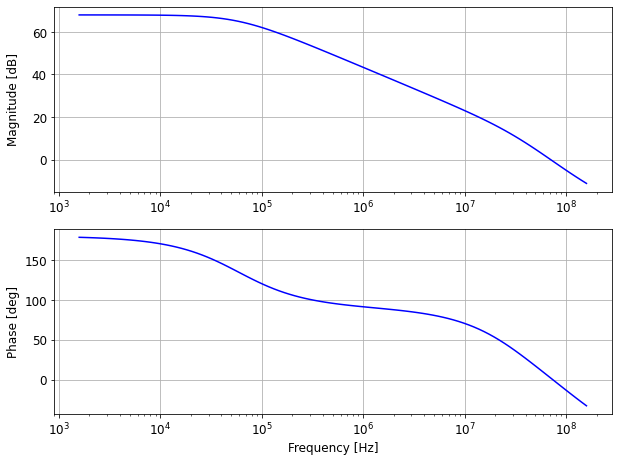

In [223]:
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

## Summary

 - The frequency response of closed-loop amplifiers relies on characteristics of the open-loop response
 - Stability of negative-feedback systems requires a phase lag of less than $180^{\circ}$ at the transit (unity-gain) frequency
 - Bode plots and root loci can be used to evaluate stability of closed-loop systems
 - To ensure "well-behaved" closed-loop responses, phase margin should be kept above ~$60^{\circ}$ (critical damping, no overshoot)
 - Mirror pole can degrade phase margin in single-ended OTAs
 - 2-stage OTAs have multiple poles and a RHP zero
 - Next time, we'll look at compensation of 2-stage CMOS OTAs